# Importing Libraries

In [1]:
import torch
import torch.nn as nn
from torch.optim import adam,lr_scheduler   # Adam optimizer and learning rate scheduler


In [2]:
# Evalution metrics, vizualization, and data preprocessing libraries

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
# Warnings Library
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

# Data Loading and Handling

In [4]:
df = pd.read_csv(r"E:\vs_code_dsa\ANN\ANN_Linear_Regression\FMCG_2022_2024.csv")
df

date     sku     brand        segment  category     channel  \
0       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk      Retail   
1       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk      Retail   
2       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk      Retail   
3       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk    Discount   
4       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk    Discount   
...            ...     ...       ...            ...       ...         ...   
190752  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar    Discount   
190753  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar    Discount   
190754  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar  E-commerce   
190755  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar  E-commerce   
190756  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar  E-commerce   

            region  pack_type  price_unit  promotion_flag  delivery_days  \
0       PL-Central  Multipack        2.38               0              1   
1         PL-North     Single        1.55               1              3   
2         PL-South     Carton        4.00               0              5   
3       PL-Central     Single        5.16               0              2   
4         PL-North     Single        7.66               0              4   
...            ...        ...         ...             ...            ...   
190752    PL-North     Single        2.55               0              2   
190753    PL-South     Single        6.01               0              5   
190754  PL-Central     Single        3.45               0              5   
190755    PL-North  Multipack        1.93               1              2   
190756    PL-South     Single        1.91               0              5   

        stock_available  delivered_qty  units_sold  
0                   141            128           9  
1                     0            129           0  
2                   118            161           8  
3                    81            114           7  
4                   148            204          12  
...                 ...            ...         ...  
190752              190            163          25  
190753              141            131          19  
190754                0            132           0  
190755              211            201          40  
190756               82            125           8  

[190757 rows x 14 columns]

In [5]:
# Printing all the unique values in categorical columns!

display(np.unique(df.sku,return_counts=True))
print("*"*80)
display(np.unique(df.brand,return_counts=True))
print("*"*80)
display(np.unique(df.segment,return_counts=True))
print("*"*80)
display(np.unique(df.category,return_counts=True))
print("*"*80)
display(np.unique(df.channel,return_counts=True))
print("*"*80)
display(np.unique(df.region,return_counts=True))
print("*"*80)
display(np.unique(df.pack_type,return_counts=True))
print("*"*80)

(array(['JU-021', 'MI-002', 'MI-006', 'MI-008', 'MI-011', 'MI-022',
        'MI-023', 'MI-026', 'RE-004', 'RE-007', 'RE-015', 'RE-017',
        'RE-025', 'SN-010', 'SN-013', 'SN-019', 'SN-027', 'SN-028',
        'SN-030', 'YO-001', 'YO-003', 'YO-005', 'YO-009', 'YO-012',
        'YO-014', 'YO-016', 'YO-018', 'YO-020', 'YO-024', 'YO-029'],
       dtype=object),
 array([6943, 5067, 8221, 4777, 4863, 6249, 7202, 8216, 7643, 7489, 7366,
        5748, 5990, 5870, 5501, 5229, 6435, 4749, 4492, 7574, 6341, 7893,
        6778, 7719, 7630, 5991, 4606, 5416, 4850, 7909]))

********************************************************************************


(array(['JuBrand3', 'MiBrand1', 'MiBrand2', 'MiBrand3', 'MiBrand4',
        'ReBrand1', 'ReBrand2', 'ReBrand4', 'SnBrand2', 'SnBrand3',
        'YoBrand1', 'YoBrand2', 'YoBrand3', 'YoBrand4'], dtype=object),
 array([ 6943, 13084,  5067, 18228,  8216,  7643, 11738, 14855, 26775,
         5501, 14060, 17349, 18981, 22317]))

********************************************************************************


(array(['Juice-Seg3', 'Milk-Seg1', 'Milk-Seg2', 'Milk-Seg3',
        'ReadyMeal-Seg1', 'ReadyMeal-Seg2', 'ReadyMeal-Seg3',
        'SnackBar-Seg1', 'SnackBar-Seg2', 'SnackBar-Seg3', 'Yogurt-Seg1',
        'Yogurt-Seg2', 'Yogurt-Seg3'], dtype=object),
 array([ 6943,  5067, 24105, 15423, 14855, 13391,  5990, 14470, 11371,
         6435, 26851, 21044, 24812]))

********************************************************************************


(array(['Juice', 'Milk', 'ReadyMeal', 'SnackBar', 'Yogurt'], dtype=object),
 array([ 6943, 44595, 34236, 32276, 72707]))

********************************************************************************


(array(['Discount', 'E-commerce', 'Retail'], dtype=object),
 array([63450, 63619, 63688]))

********************************************************************************


(array(['PL-Central', 'PL-North', 'PL-South'], dtype=object),
 array([63545, 63645, 63567]))

********************************************************************************


(array(['Carton', 'Multipack', 'Single'], dtype=object),
 array([63671, 63550, 63536]))

********************************************************************************


In [6]:
# COnverting object type to date Type object using pd.to_datetime() function, basically it's typecasting!
df.date  = pd.to_datetime(df.date)
df.head()

date     sku     brand    segment category   channel      region  \
0 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail  PL-Central   
1 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-North   
2 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-South   
3 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount  PL-Central   
4 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount    PL-North   

   pack_type  price_unit  promotion_flag  delivery_days  stock_available  \
0  Multipack        2.38               0              1              141   
1     Single        1.55               1              3                0   
2     Carton        4.00               0              5              118   
3     Single        5.16               0              2               81   
4     Single        7.66               0              4              148   

   delivered_qty  units_sold  
0            128           9  
1            129           0  
2            161           8  
3            114           7  
4            204          12

In [7]:
# converting date time object to 3 new columns to get monthly and yearly sales data!

df['day'] = df.date.dt.day
df["month"] = df.date.dt.month
df['year'] = df.date.dt.year

#We do this to split data to weekdays and weekend for better usecase of available data. 
#since we know that weekends prefer better sales than weekdays, this is a manual observation made but same lies true with data
df['is_weekend'] = df.date.dt.day_of_week  
display(df.is_weekend.unique())  # 5 is saturday and 6 is sunday!
df.is_weekend = df.is_weekend.apply(lambda x : True if x>=5 else False)
display(df.is_weekend.unique())  # 5 is saturday and 6 is sunday!
display(np.unique(df.is_weekend,return_counts=True))  # 5 is saturday and 6 is sunday!


array([4, 5, 6, 0, 1, 2, 3], dtype=int32)

array([False,  True])

(array([False,  True]), array([136228,  54529]))

In [8]:
df.head()

date     sku     brand    segment category   channel      region  \
0 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail  PL-Central   
1 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-North   
2 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-South   
3 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount  PL-Central   
4 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount    PL-North   

   pack_type  price_unit  promotion_flag  delivery_days  stock_available  \
0  Multipack        2.38               0              1              141   
1     Single        1.55               1              3                0   
2     Carton        4.00               0              5              118   
3     Single        5.16               0              2               81   
4     Single        7.66               0              4              148   

   delivered_qty  units_sold  day  month  year  is_weekend  
0            128           9   21      1  2022       False  
1            129           0   21      1  2022       False  
2            161           8   21      1  2022       False  
3            114           7   21      1  2022       False  
4            204          12   21      1  2022       False

# Converting all 7 categorical variables to Numerical using label encoding

In [9]:

from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
df1 = df.copy()
label_encoders = {}

# Identify categorical columns
cat_cols = ['sku', 'brand', 'segment', 'category', 'channel', 'region', 'pack_type']

# Label encode each categorical column
for col in cat_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df1.head()

date  sku  brand  segment  category  channel  region  pack_type  \
0 2022-01-21    2      1        3         1        2       0          1   
1 2022-01-21    2      1        3         1        2       1          2   
2 2022-01-21    2      1        3         1        2       2          0   
3 2022-01-21    2      1        3         1        0       0          2   
4 2022-01-21    2      1        3         1        0       1          2   

   price_unit  promotion_flag  delivery_days  stock_available  delivered_qty  \
0        2.38               0              1              141            128   
1        1.55               1              3                0            129   
2        4.00               0              5              118            161   
3        5.16               0              2               81            114   
4        7.66               0              4              148            204   

   units_sold  day  month  year  is_weekend  
0           9   21      1  2022       False  
1           0   21      1  2022       False  
2           8   21      1  2022       False  
3           7   21      1  2022       False  
4          12   21      1  2022       False

# Mutual Information (Non linear relevancy to target varaible)
### Note :we are doing this to see if we can skip any categorical column (equilvalent to finding lowely correlated variables)

In [10]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

X = df1[cat_cols]
y = df1['units_sold']

mi_scores = mutual_info_regression(X, y, discrete_features=True)
print(mi_scores)

# Create and sort DataFrame
mi_df = pd.DataFrame({'Feature': cat_cols, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

print("🔍 Mutual Information Scores:\n", mi_df)


[0.021536   0.01890331 0.01865093 0.01526091 0.         0.00103351
 0.00186579]
🔍 Mutual Information Scores:
      Feature  MI_Score
0        sku  0.021536
1      brand  0.018903
2    segment  0.018651
3   category  0.015261
6  pack_type  0.001866
5     region  0.001034
4    channel  0.000000


### ANOVA F-test checks whether the mean of a numeric feature differs across categories. Since your target (units_sold) is continuous, this trick lets us use it with ANOVA by converting it to discrete categories.

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# You can bin your target for ANOVA (optional)
df1['units_bin'] = pd.qcut(df1['units_sold'], q=5, labels=False)

f_values, p_values = f_classif(X, df1['units_bin'])

anova_df = pd.DataFrame({
    'Feature': cat_cols,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print("\n📊 ANOVA F-test Results:\n", anova_df)



📊 ANOVA F-test Results:
      Feature     F_value   p_value
0        sku  913.155641  0.000000
3   category  849.460247  0.000000
1      brand  816.672969  0.000000
2    segment  751.379966  0.000000
6  pack_type    2.460222  0.043199
5     region    1.679305  0.151613
4    channel    0.161607  0.957767


In [12]:
df1

date  sku  brand  segment  category  channel  region  pack_type  \
0      2022-01-21    2      1        3         1        2       0          1   
1      2022-01-21    2      1        3         1        2       1          2   
2      2022-01-21    2      1        3         1        2       2          0   
3      2022-01-21    2      1        3         1        0       0          2   
4      2022-01-21    2      1        3         1        0       1          2   
...           ...  ...    ...      ...       ...      ...     ...        ...   
190752 2024-12-31   18      8        7         3        0       1          2   
190753 2024-12-31   18      8        7         3        0       2          2   
190754 2024-12-31   18      8        7         3        1       0          2   
190755 2024-12-31   18      8        7         3        1       1          1   
190756 2024-12-31   18      8        7         3        1       2          2   

        price_unit  promotion_flag  delivery_days  stock_available  \
0             2.38               0              1              141   
1             1.55               1              3                0   
2             4.00               0              5              118   
3             5.16               0              2               81   
4             7.66               0              4              148   
...            ...             ...            ...              ...   
190752        2.55               0              2              190   
190753        6.01               0              5              141   
190754        3.45               0              5                0   
190755        1.93               1              2              211   
190756        1.91               0              5               82   

        delivered_qty  units_sold  day  month  year  is_weekend  units_bin  
0                 128           9   21      1  2022       False          0  
1                 129           0   21      1  2022       False          0  
2                 161           8   21      1  2022       False          0  
3                 114           7   21      1  2022       False          0  
4                 204          12   21      1  2022       False          1  
...               ...         ...  ...    ...   ...         ...        ...  
190752            163          25   31     12  2024       False          3  
190753            131          19   31     12  2024       False          2  
190754            132           0   31     12  2024       False          0  
190755            201          40   31     12  2024       False          4  
190756            125           8   31     12  2024       False          0  

[190757 rows x 19 columns]

# Interpretting Results!

| Feature        | MI Score | Interpretation                                                   |
| -------------- | -------- | ---------------------------------------------------------------- |
| **sku**        | 0.0245   | Most predictive categorical feature (but still weakly nonlinear) |
| **brand**      | 0.0223   | Brand has some information gain about `units_sold`               |
| **segment**    | 0.0207   | Segment affects sales moderately                                 |
| **category**   | 0.0170   | Minor effect                                                     |
| **pack\_type** | 0.0019   | Very little impact                                               |
| **region**     | 0.0000   | Almost no information about sales                                |
| **channel**    | 0.0000   | No contribution to predicting `units_sold` (surprising!)         |

Mutual Information (MI) captures non-linear relationships.

Anything below ~0.01 is negligible, unless part of interactions or domain-specific logic.

-------------------------------------------------------------------------------------------------------------------------
| Feature        | F-value | p-value | Interpretation                         |
| -------------- | ------- | ------- | -------------------------------------- |
| **sku**        | 913.15  | 0.0000  | Strong linear relationship with target |
| **category**   | 849.46  | 0.0000  | High influence on sales                |
| **brand**      | 816.67  | 0.0000  | Highly significant                     |
| **segment**    | 751.38  | 0.0000  | Also very predictive                   |
| **pack\_type** | 2.46    | 0.0432  | Weak but statistically significant     |
| **region**     | 1.68    | 0.1516  | Not significant                        |
| **channel**    | 0.16    | 0.9578  | Not significant at all                 |


=> Drop or deprioritize:
channel, region — low to zero predictive power.
These columns are useless for predicting Y(units_sold) but they can be good factors for vizualization.
So, we drop them during our test train split. but still use them in vizualizations! 




# checking for missing values

In [13]:
df.isna().sum()  #No missing values

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
day                0
month              0
year               0
is_weekend         0
dtype: int64

# Data Vizualization

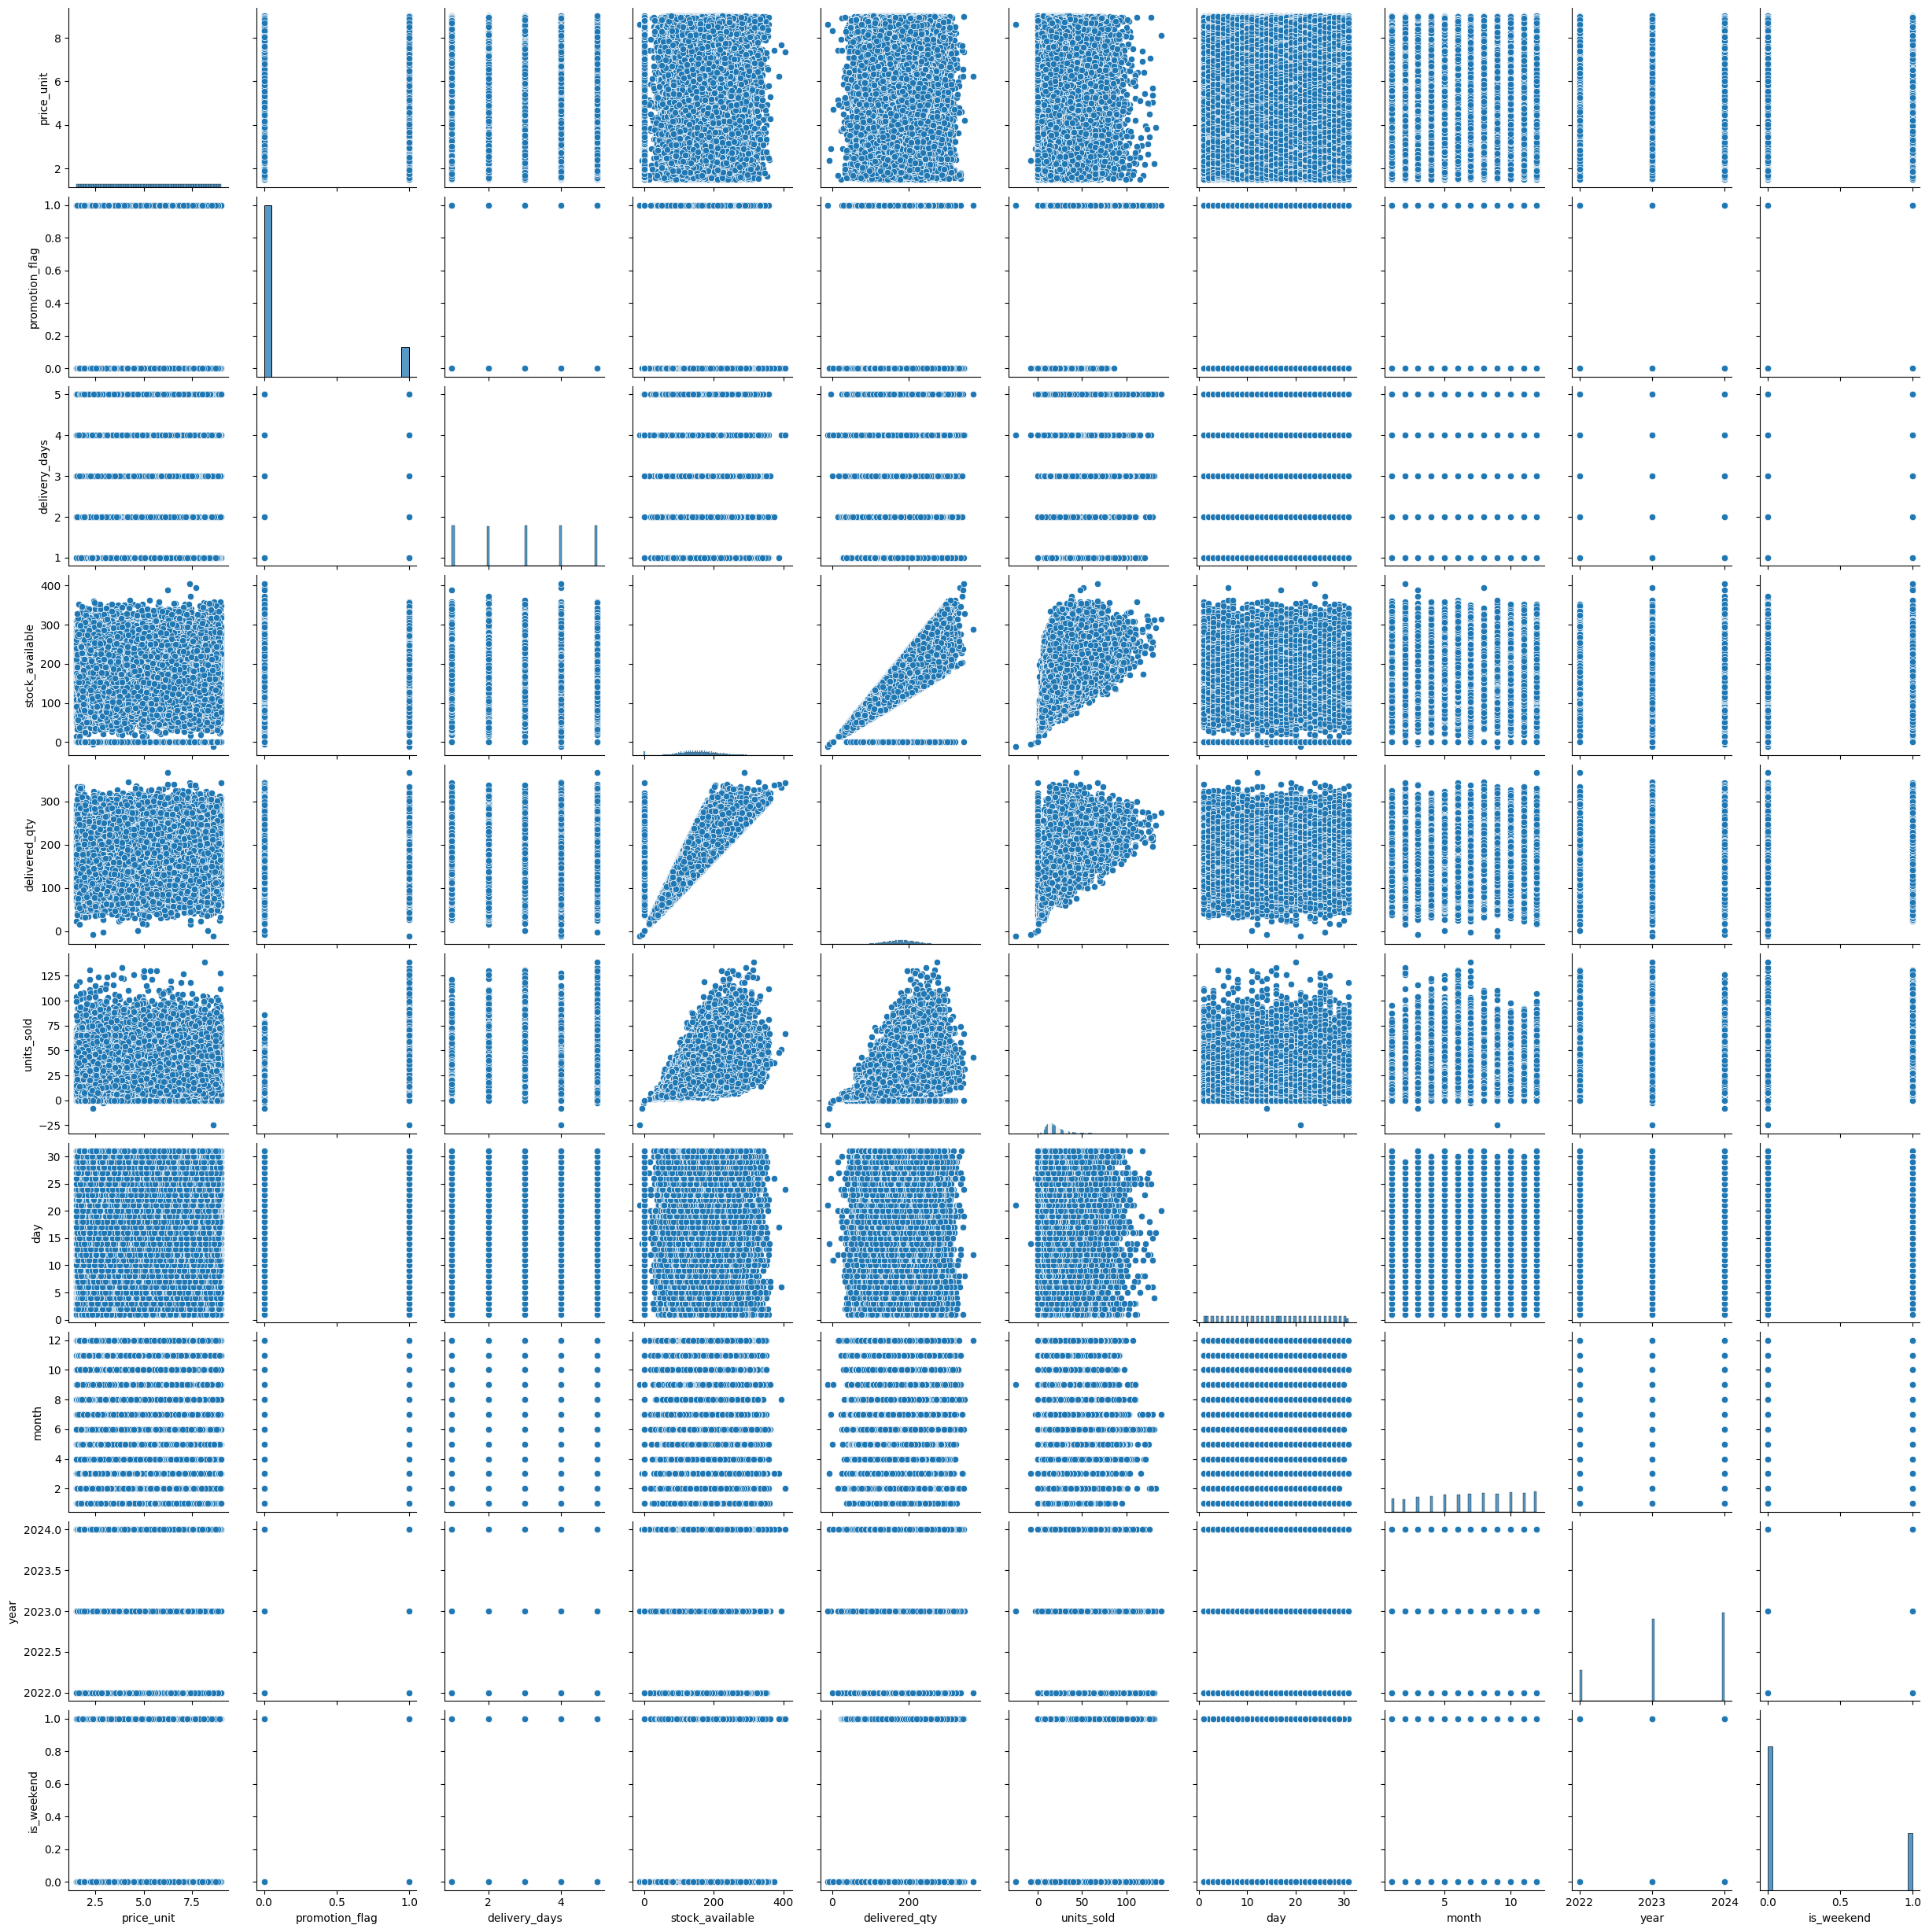

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190757 non-null  datetime64[ns]
 1   sku              190757 non-null  object        
 2   brand            190757 non-null  object        
 3   segment          190757 non-null  object        
 4   category         190757 non-null  object        
 5   channel          190757 non-null  object        
 6   region           190757 non-null  object        
 7   pack_type        190757 non-null  object        
 8   price_unit       190757 non-null  float64       
 9   promotion_flag   190757 non-null  int64         
 10  delivery_days    190757 non-null  int64         
 11  stock_available  190757 non-null  int64         
 12  delivered_qty    190757 non-null  int64         
 13  units_sold       190757 non-null  int64         
 14  day              190

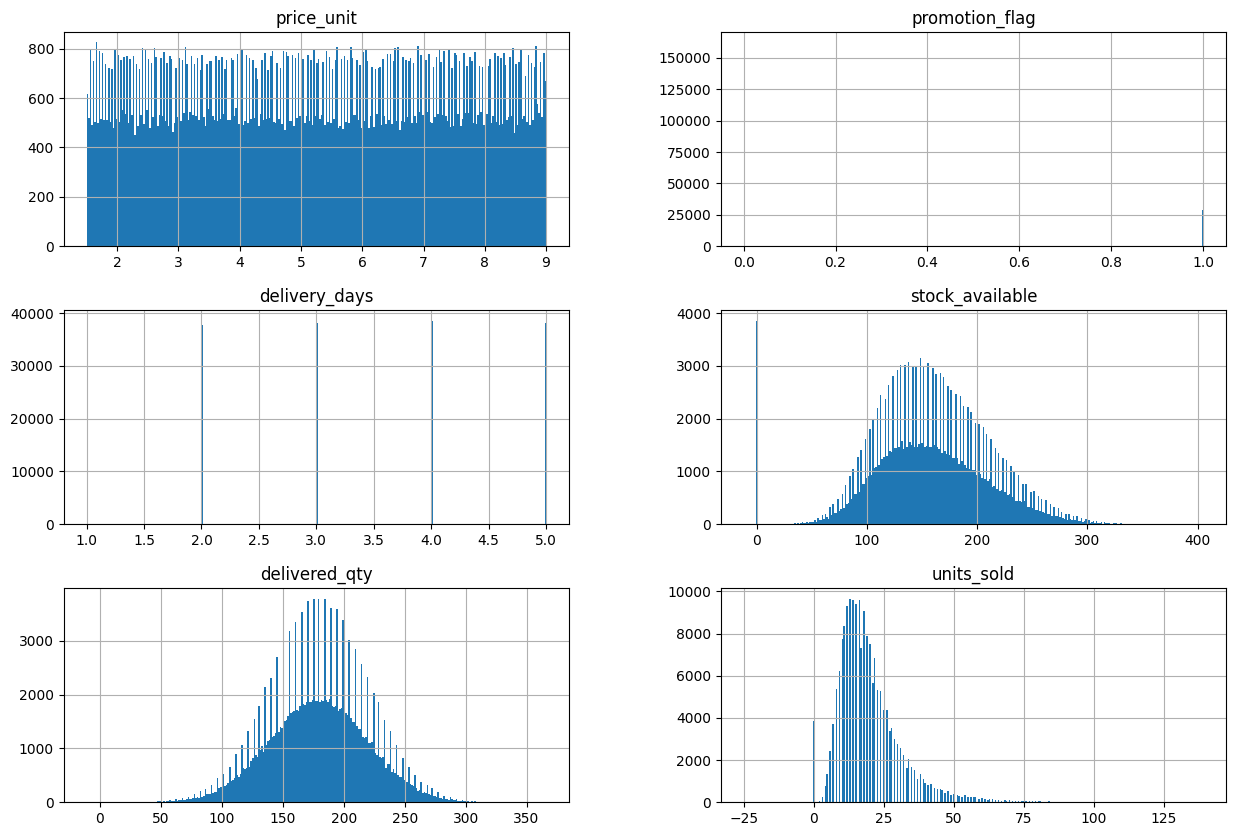

In [16]:
# Plotting Histograms for each Numeriacal feature

df.select_dtypes(include=['float64', 'int64']).hist(bins=300, figsize=(15, 10))
plt.show()

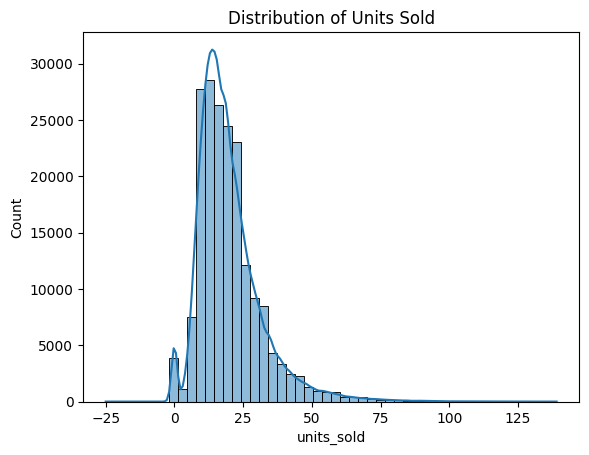

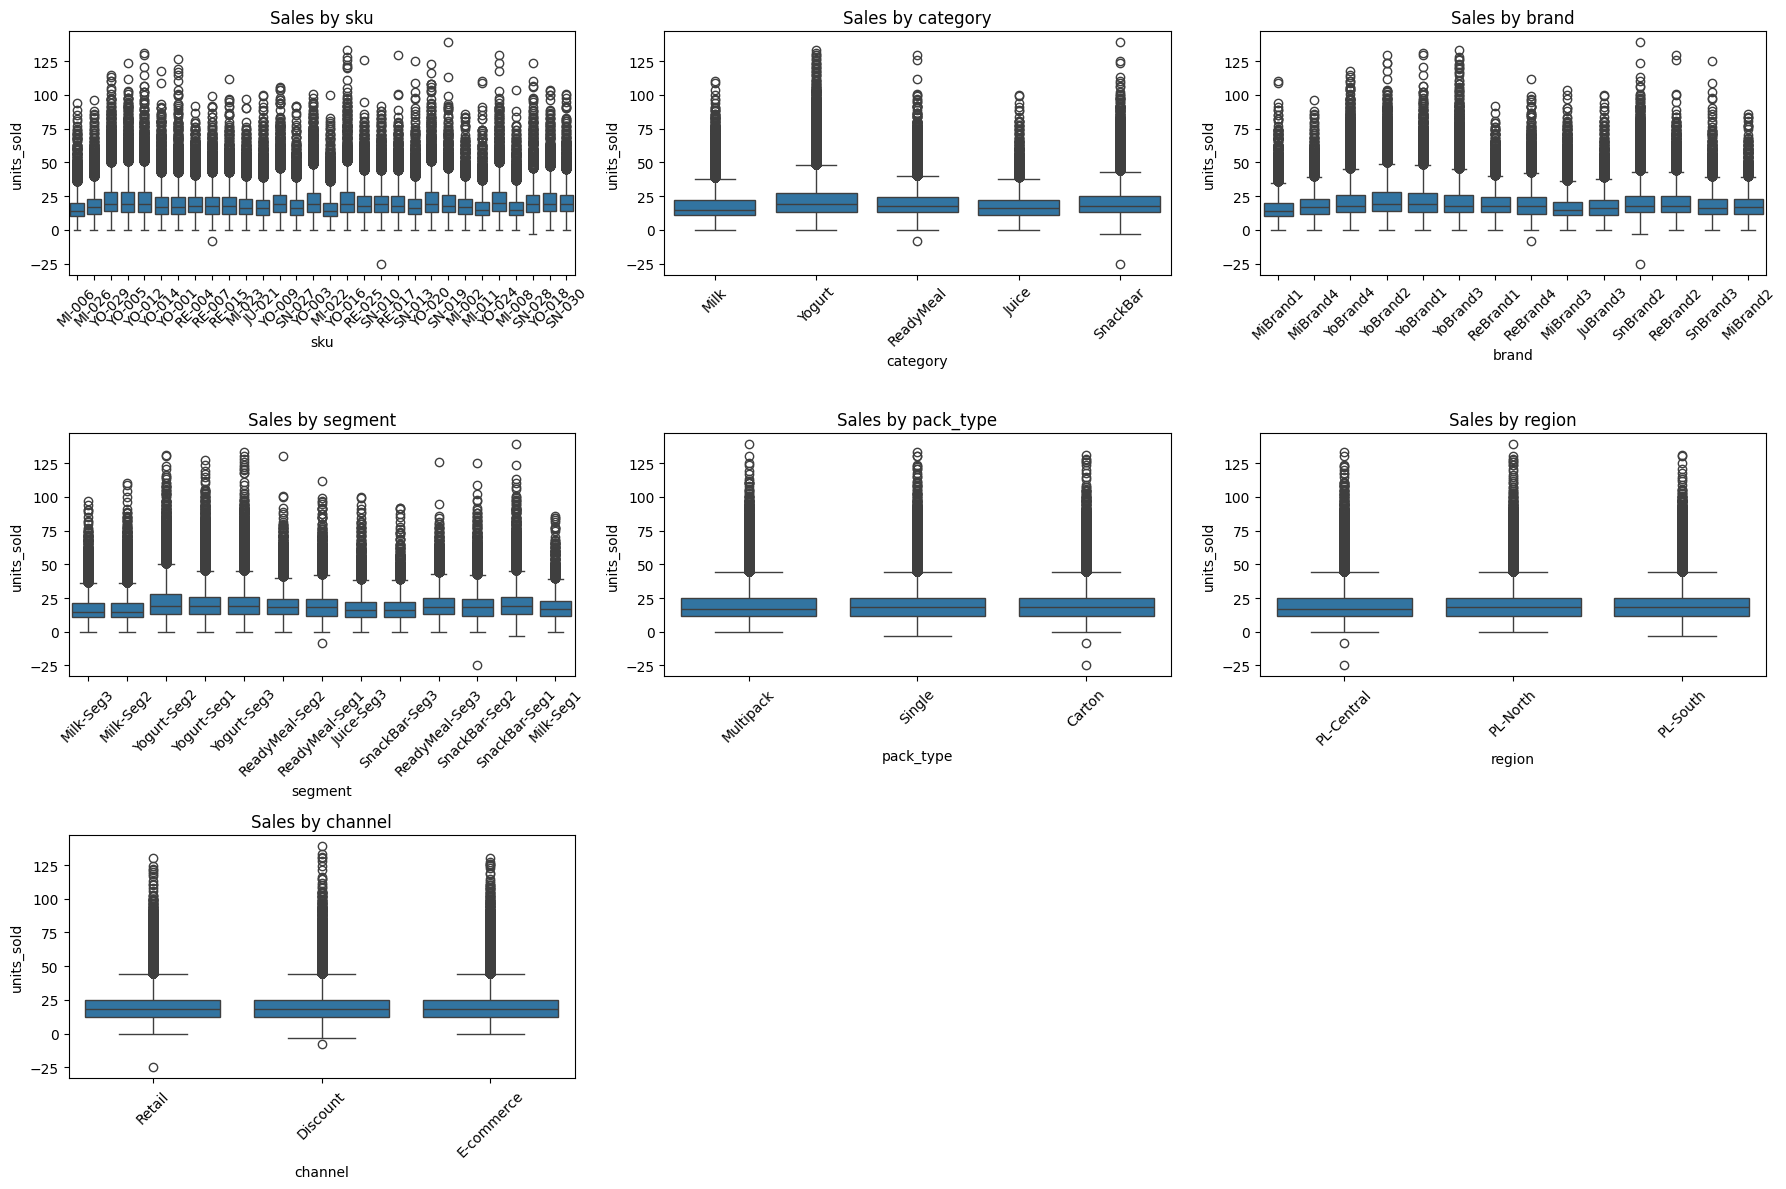

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
# y do we need this?
# If y is heavily skewed, consider log-transforming it during preprocessing.
# The graph appears okaish, it looks close to gaussian curve which means it has normal distribution.

sns.histplot(df['units_sold'], bins=50, kde=True)
plt.title("Distribution of Units Sold")
plt.show()


box_columns = ['sku','category','brand','segment','pack_type','region','channel']
num_plots = len(box_columns)

# Grid size
rows = 3
cols = 3

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))  # Adjust size as needed
axes = axes.flatten()

# Plot each boxplot
for i, col_name in enumerate(box_columns):
    sns.boxplot(x=col_name, y='units_sold', data=df, ax=axes[i])
    axes[i].set_title(f"Sales by {col_name}")
    axes[i].tick_params(axis='x', labelrotation=45)
    
# Hide empty plots (if any)
for j in range(len(box_columns), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




In [18]:
df.select_dtypes(include=['float64', 'int64','boolean']).corr()

price_unit  promotion_flag  delivery_days  stock_available  \
price_unit         1.000000        0.003464       0.002135        -0.002081   
promotion_flag     0.003464        1.000000      -0.000679        -0.003310   
delivery_days      0.002135       -0.000679       1.000000         0.002894   
stock_available   -0.002081       -0.003310       0.002894         1.000000   
delivered_qty     -0.004184       -0.005672       0.002218         0.668957   
units_sold        -0.001088        0.503117       0.003468         0.580335   
is_weekend        -0.000316       -0.000220      -0.001755         0.001036   

                 delivered_qty  units_sold  is_weekend  
price_unit           -0.004184   -0.001088   -0.000316  
promotion_flag       -0.005672    0.503117   -0.000220  
delivery_days         0.002218    0.003468   -0.001755  
stock_available       0.668957    0.580335    0.001036  
delivered_qty         1.000000    0.389198   -0.000114  
units_sold            0.389198    1.000000    0.000059  
is_weekend           -0.000114    0.000059    1.000000

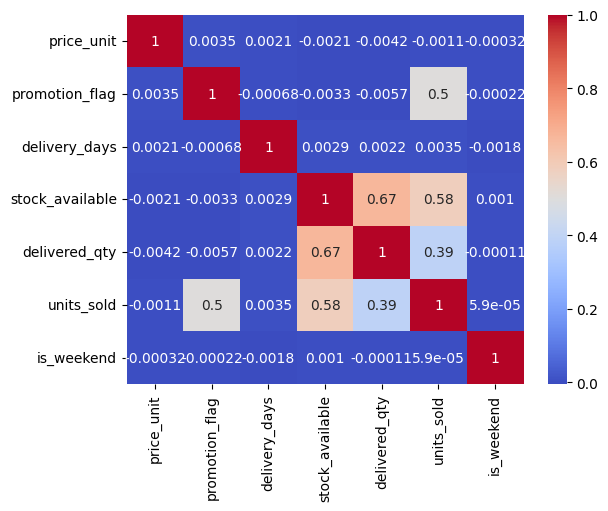

In [19]:
# Dropping unnecessary columns
sns.heatmap(df.select_dtypes(include=['float64', 'int64','boolean']).corr(), annot=True, cmap='coolwarm')
plt.show()

# There is more than decent correlation among all the features, so we don't need to drop any features.

# Categorical => Numerical using one hot encoder!

In [20]:
box_columns

['sku', 'category', 'brand', 'segment', 'pack_type', 'region', 'channel']

In [21]:
# we loop through multiple categorical varaible and create ohe for each category and create new columns and merge them with original dataset
from sklearn.preprocessing import OneHotEncoder

ohe_columns = ['sku', 'brand', 'segment', 'category', 'pack_type']  # skipping 'channel' and 'region'

# Dictionary to store OHE DataFrames
ohe_dict = {}

# for col in ohe_columns:
#     ohe = pd.get_dummies(df[col], prefix=col)
#     ohe_dict[col] = ohe

for column in ohe_columns:
    print(np.unique(df[column]))
    ohe = OneHotEncoder(sparse_output=False)  # Doesn't output a sparse matrix, no need to flatten it to 2d array!
    var_df = ohe.fit_transform(np.reshape(df[column],shape=(-1,1)))
    var_df  = pd.DataFrame(var_df,columns = [f'{column}_{var}' for var in ohe.categories_[0]])
    df = pd.merge(df,var_df,left_index=True,right_index=True)
    df.drop(column,axis=1,inplace=True)
    display(df.head())
    
    # save the ohe (we need it for streamlit code)
    ohe_dict[f'ohe_{column}'] = ohe
    print(ohe_dict)  
    print("*"*150)    


['JU-021' 'MI-002' 'MI-006' 'MI-008' 'MI-011' 'MI-022' 'MI-023' 'MI-026'
 'RE-004' 'RE-007' 'RE-015' 'RE-017' 'RE-025' 'SN-010' 'SN-013' 'SN-019'
 'SN-027' 'SN-028' 'SN-030' 'YO-001' 'YO-003' 'YO-005' 'YO-009' 'YO-012'
 'YO-014' 'YO-016' 'YO-018' 'YO-020' 'YO-024' 'YO-029']


date     brand    segment category   channel      region  pack_type  \
0 2022-01-21  MiBrand1  Milk-Seg3     Milk    Retail  PL-Central  Multipack   
1 2022-01-21  MiBrand1  Milk-Seg3     Milk    Retail    PL-North     Single   
2 2022-01-21  MiBrand1  Milk-Seg3     Milk    Retail    PL-South     Carton   
3 2022-01-21  MiBrand1  Milk-Seg3     Milk  Discount  PL-Central     Single   
4 2022-01-21  MiBrand1  Milk-Seg3     Milk  Discount    PL-North     Single   

   price_unit  promotion_flag  delivery_days  ...  sku_YO-003  sku_YO-005  \
0        2.38               0              1  ...         0.0         0.0   
1        1.55               1              3  ...         0.0         0.0   
2        4.00               0              5  ...         0.0         0.0   
3        5.16               0              2  ...         0.0         0.0   
4        7.66               0              4  ...         0.0         0.0   

   sku_YO-009  sku_YO-012  sku_YO-014  sku_YO-016  sku_YO-018  sku_YO-020  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   sku_YO-024  sku_YO-029  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0  

[5 rows x 47 columns]

{'ohe_sku': OneHotEncoder(sparse_output=False)}
******************************************************************************************************************************************************
['JuBrand3' 'MiBrand1' 'MiBrand2' 'MiBrand3' 'MiBrand4' 'ReBrand1'
 'ReBrand2' 'ReBrand4' 'SnBrand2' 'SnBrand3' 'YoBrand1' 'YoBrand2'
 'YoBrand3' 'YoBrand4']


date    segment category   channel      region  pack_type  price_unit  \
0 2022-01-21  Milk-Seg3     Milk    Retail  PL-Central  Multipack        2.38   
1 2022-01-21  Milk-Seg3     Milk    Retail    PL-North     Single        1.55   
2 2022-01-21  Milk-Seg3     Milk    Retail    PL-South     Carton        4.00   
3 2022-01-21  Milk-Seg3     Milk  Discount  PL-Central     Single        5.16   
4 2022-01-21  Milk-Seg3     Milk  Discount    PL-North     Single        7.66   

   promotion_flag  delivery_days  stock_available  ...  brand_MiBrand4  \
0               0              1              141  ...             0.0   
1               1              3                0  ...             0.0   
2               0              5              118  ...             0.0   
3               0              2               81  ...             0.0   
4               0              4              148  ...             0.0   

   brand_ReBrand1  brand_ReBrand2  brand_ReBrand4  brand_SnBrand2  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   brand_SnBrand3  brand_YoBrand1  brand_YoBrand2  brand_YoBrand3  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   brand_YoBrand4  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 60 columns]

{'ohe_sku': OneHotEncoder(sparse_output=False), 'ohe_brand': OneHotEncoder(sparse_output=False)}
******************************************************************************************************************************************************
['Juice-Seg3' 'Milk-Seg1' 'Milk-Seg2' 'Milk-Seg3' 'ReadyMeal-Seg1'
 'ReadyMeal-Seg2' 'ReadyMeal-Seg3' 'SnackBar-Seg1' 'SnackBar-Seg2'
 'SnackBar-Seg3' 'Yogurt-Seg1' 'Yogurt-Seg2' 'Yogurt-Seg3']


date category   channel      region  pack_type  price_unit  \
0 2022-01-21     Milk    Retail  PL-Central  Multipack        2.38   
1 2022-01-21     Milk    Retail    PL-North     Single        1.55   
2 2022-01-21     Milk    Retail    PL-South     Carton        4.00   
3 2022-01-21     Milk  Discount  PL-Central     Single        5.16   
4 2022-01-21     Milk  Discount    PL-North     Single        7.66   

   promotion_flag  delivery_days  stock_available  delivered_qty  ...  \
0               0              1              141            128  ...   
1               1              3                0            129  ...   
2               0              5              118            161  ...   
3               0              2               81            114  ...   
4               0              4              148            204  ...   

   segment_Milk-Seg3  segment_ReadyMeal-Seg1  segment_ReadyMeal-Seg2  \
0                1.0                     0.0                     0.0   
1                1.0                     0.0                     0.0   
2                1.0                     0.0                     0.0   
3                1.0                     0.0                     0.0   
4                1.0                     0.0                     0.0   

   segment_ReadyMeal-Seg3  segment_SnackBar-Seg1  segment_SnackBar-Seg2  \
0                     0.0                    0.0                    0.0   
1                     0.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0                    0.0                    0.0   

   segment_SnackBar-Seg3  segment_Yogurt-Seg1  segment_Yogurt-Seg2  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   

   segment_Yogurt-Seg3  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 72 columns]

{'ohe_sku': OneHotEncoder(sparse_output=False), 'ohe_brand': OneHotEncoder(sparse_output=False), 'ohe_segment': OneHotEncoder(sparse_output=False)}
******************************************************************************************************************************************************
['Juice' 'Milk' 'ReadyMeal' 'SnackBar' 'Yogurt']


date   channel      region  pack_type  price_unit  promotion_flag  \
0 2022-01-21    Retail  PL-Central  Multipack        2.38               0   
1 2022-01-21    Retail    PL-North     Single        1.55               1   
2 2022-01-21    Retail    PL-South     Carton        4.00               0   
3 2022-01-21  Discount  PL-Central     Single        5.16               0   
4 2022-01-21  Discount    PL-North     Single        7.66               0   

   delivery_days  stock_available  delivered_qty  units_sold  ...  \
0              1              141            128           9  ...   
1              3                0            129           0  ...   
2              5              118            161           8  ...   
3              2               81            114           7  ...   
4              4              148            204          12  ...   

   segment_SnackBar-Seg2  segment_SnackBar-Seg3  segment_Yogurt-Seg1  \
0                    0.0                    0.0                  0.0   
1                    0.0                    0.0                  0.0   
2                    0.0                    0.0                  0.0   
3                    0.0                    0.0                  0.0   
4                    0.0                    0.0                  0.0   

   segment_Yogurt-Seg2  segment_Yogurt-Seg3  category_Juice  category_Milk  \
0                  0.0                  0.0             0.0            1.0   
1                  0.0                  0.0             0.0            1.0   
2                  0.0                  0.0             0.0            1.0   
3                  0.0                  0.0             0.0            1.0   
4                  0.0                  0.0             0.0            1.0   

   category_ReadyMeal  category_SnackBar  category_Yogurt  
0                 0.0                0.0              0.0  
1                 0.0                0.0              0.0  
2                 0.0                0.0              0.0  
3                 0.0                0.0              0.0  
4                 0.0                0.0              0.0  

[5 rows x 76 columns]

{'ohe_sku': OneHotEncoder(sparse_output=False), 'ohe_brand': OneHotEncoder(sparse_output=False), 'ohe_segment': OneHotEncoder(sparse_output=False), 'ohe_category': OneHotEncoder(sparse_output=False)}
******************************************************************************************************************************************************
['Carton' 'Multipack' 'Single']


date   channel      region  price_unit  promotion_flag  delivery_days  \
0 2022-01-21    Retail  PL-Central        2.38               0              1   
1 2022-01-21    Retail    PL-North        1.55               1              3   
2 2022-01-21    Retail    PL-South        4.00               0              5   
3 2022-01-21  Discount  PL-Central        5.16               0              2   
4 2022-01-21  Discount    PL-North        7.66               0              4   

   stock_available  delivered_qty  units_sold  day  ...  segment_Yogurt-Seg2  \
0              141            128           9   21  ...                  0.0   
1                0            129           0   21  ...                  0.0   
2              118            161           8   21  ...                  0.0   
3               81            114           7   21  ...                  0.0   
4              148            204          12   21  ...                  0.0   

   segment_Yogurt-Seg3  category_Juice  category_Milk  category_ReadyMeal  \
0                  0.0             0.0            1.0                 0.0   
1                  0.0             0.0            1.0                 0.0   
2                  0.0             0.0            1.0                 0.0   
3                  0.0             0.0            1.0                 0.0   
4                  0.0             0.0            1.0                 0.0   

   category_SnackBar  category_Yogurt  pack_type_Carton  pack_type_Multipack  \
0                0.0              0.0               0.0                  1.0   
1                0.0              0.0               0.0                  0.0   
2                0.0              0.0               1.0                  0.0   
3                0.0              0.0               0.0                  0.0   
4                0.0              0.0               0.0                  0.0   

   pack_type_Single  
0               0.0  
1               1.0  
2               0.0  
3               1.0  
4               1.0  

[5 rows x 78 columns]

{'ohe_sku': OneHotEncoder(sparse_output=False), 'ohe_brand': OneHotEncoder(sparse_output=False), 'ohe_segment': OneHotEncoder(sparse_output=False), 'ohe_category': OneHotEncoder(sparse_output=False), 'ohe_pack_type': OneHotEncoder(sparse_output=False)}
******************************************************************************************************************************************************


In [22]:
df.columns

Index(['date', 'channel', 'region', 'price_unit', 'promotion_flag',
       'delivery_days', 'stock_available', 'delivered_qty', 'units_sold',
       'day', 'month', 'year', 'is_weekend', 'sku_JU-021', 'sku_MI-002',
       'sku_MI-006', 'sku_MI-008', 'sku_MI-011', 'sku_MI-022', 'sku_MI-023',
       'sku_MI-026', 'sku_RE-004', 'sku_RE-007', 'sku_RE-015', 'sku_RE-017',
       'sku_RE-025', 'sku_SN-010', 'sku_SN-013', 'sku_SN-019', 'sku_SN-027',
       'sku_SN-028', 'sku_SN-030', 'sku_YO-001', 'sku_YO-003', 'sku_YO-005',
       'sku_YO-009', 'sku_YO-012', 'sku_YO-014', 'sku_YO-016', 'sku_YO-018',
       'sku_YO-020', 'sku_YO-024', 'sku_YO-029', 'brand_JuBrand3',
       'brand_MiBrand1', 'brand_MiBrand2', 'brand_MiBrand3', 'brand_MiBrand4',
       'brand_ReBrand1', 'brand_ReBrand2', 'brand_ReBrand4', 'brand_SnBrand2',
       'brand_SnBrand3', 'brand_YoBrand1', 'brand_YoBrand2', 'brand_YoBrand3',
       'brand_YoBrand4', 'segment_Juice-Seg3', 'segment_Milk-Seg1',
       'segment_Milk-Seg2', 

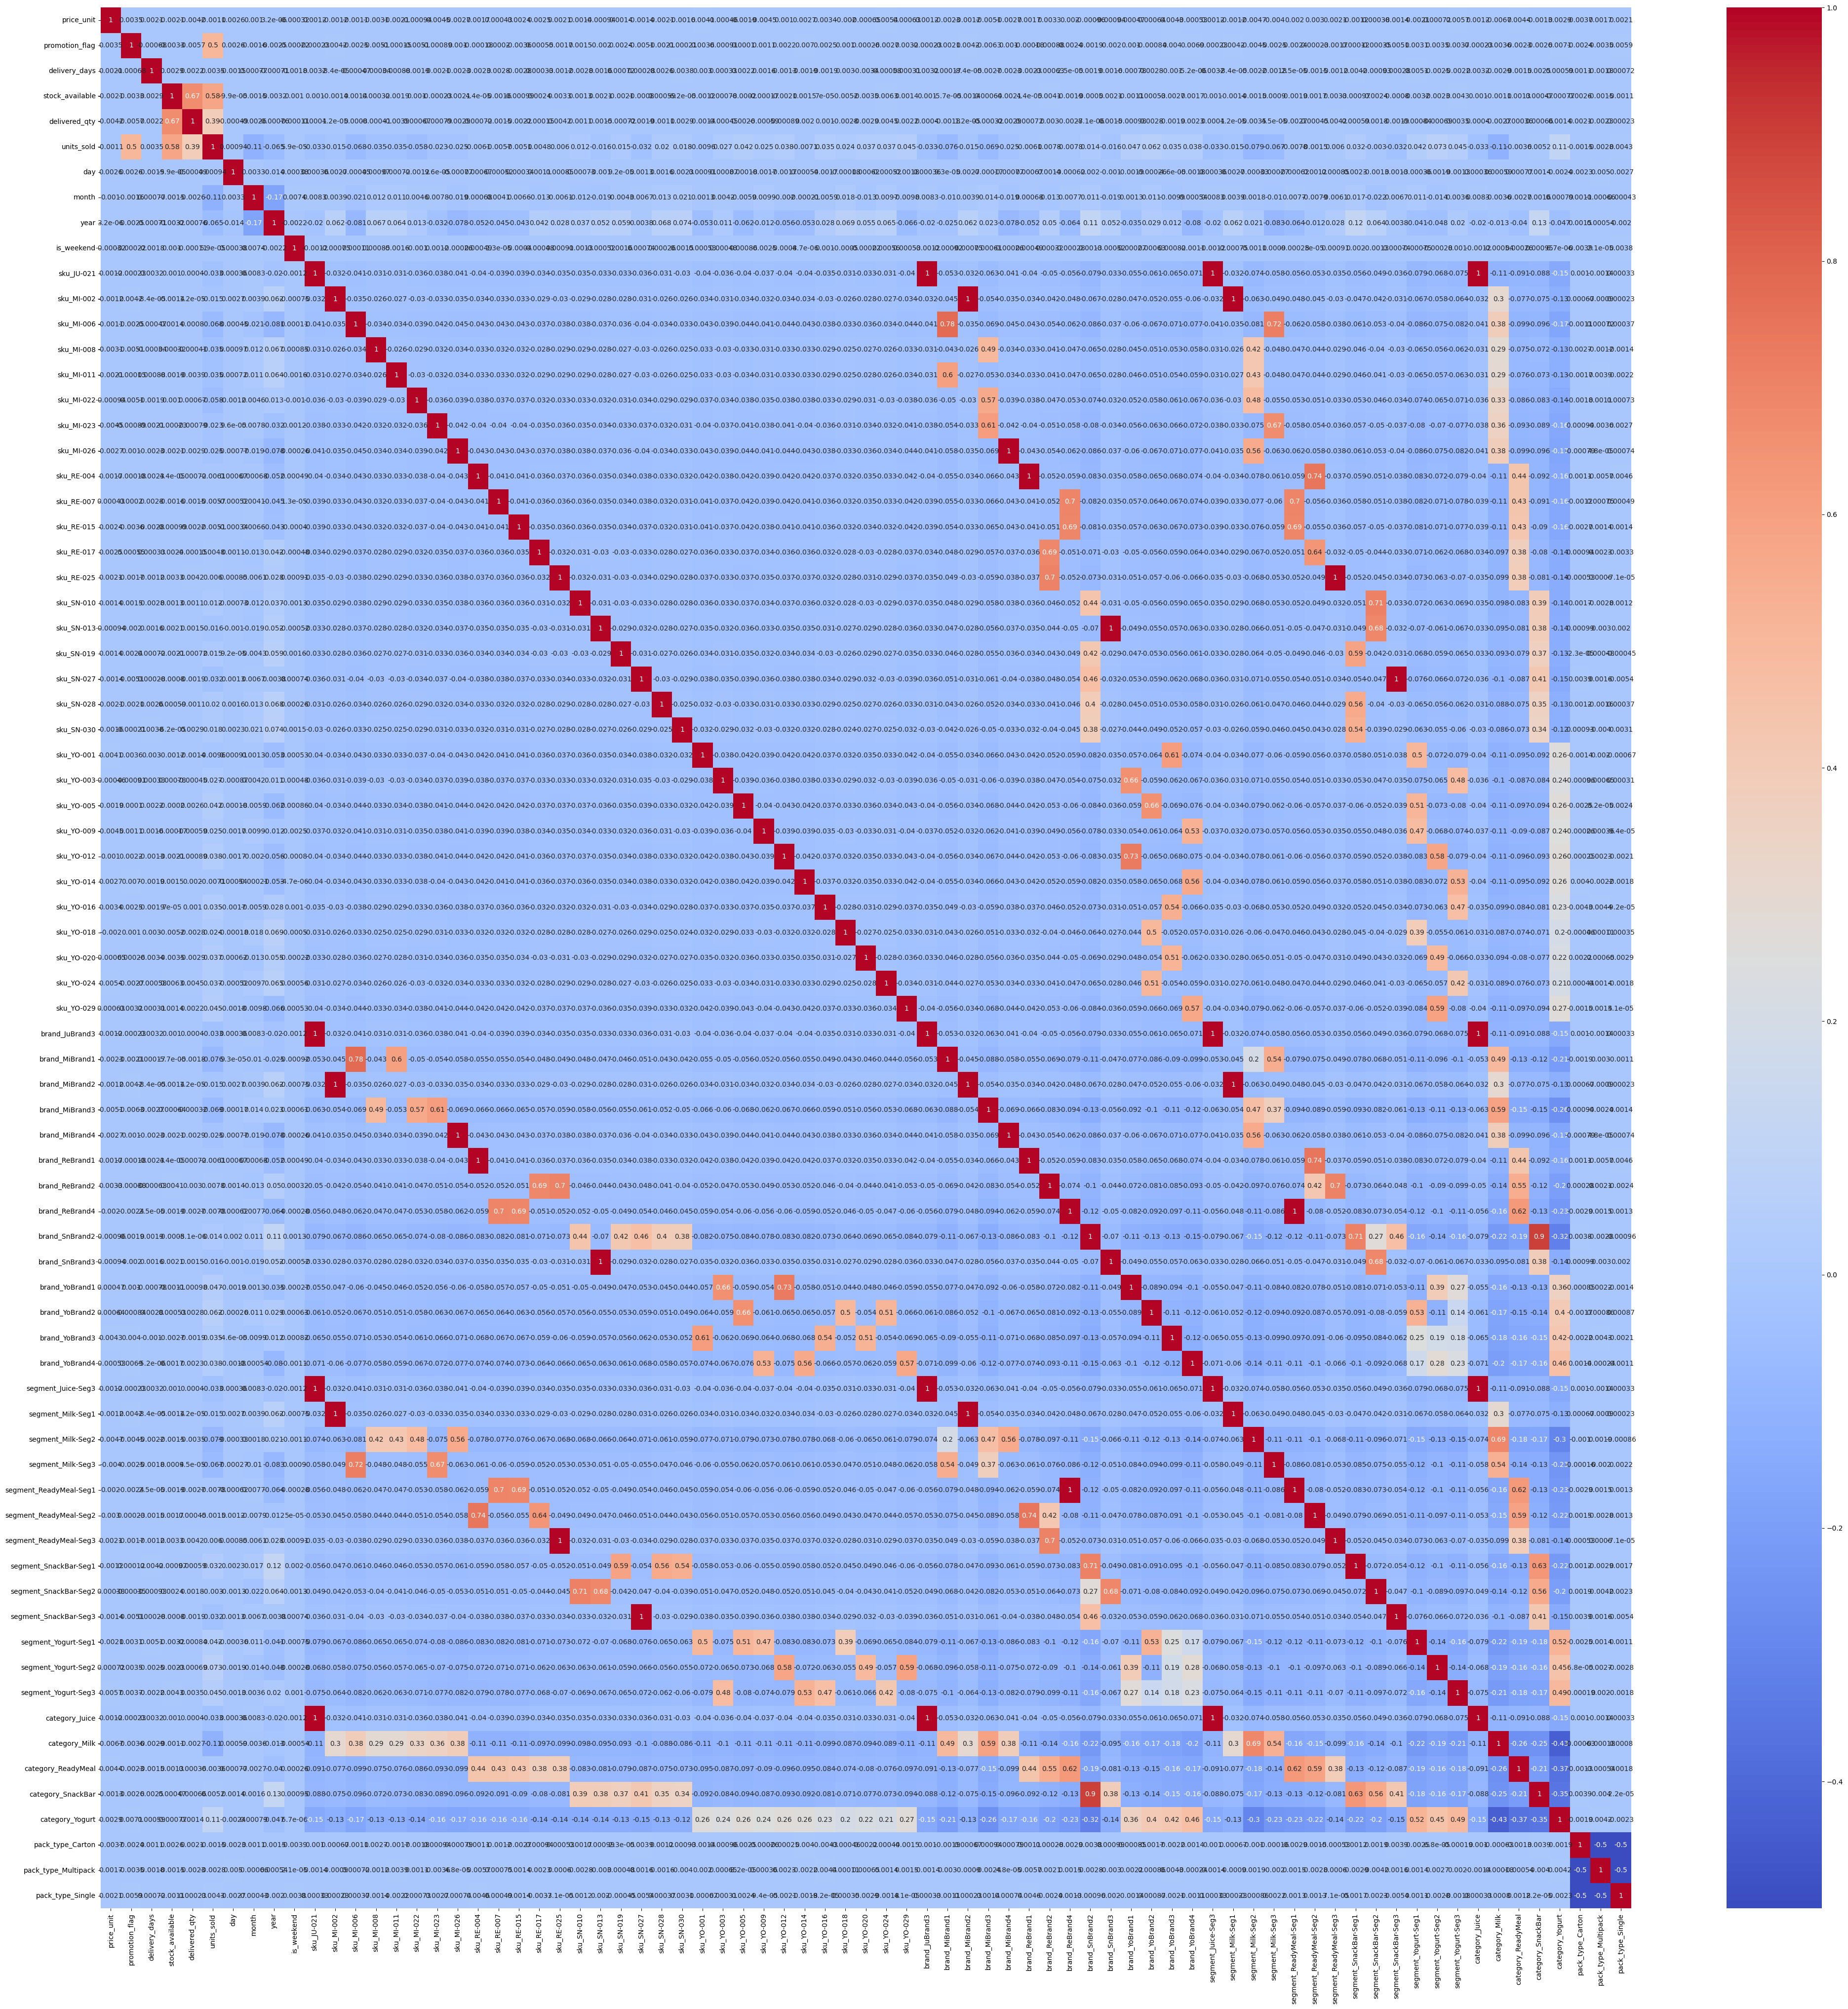

In [23]:
plt.figure(figsize=(50, 50))  # Wider and taller
sns.heatmap(df.drop(['date','channel','region'],axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

# Data Splitting into x,y

In [24]:
Y = df.units_sold
X = df.drop(['date','channel','region','units_sold'],axis= 1) # dropping useless variables! can see this info from MI score and F-test done above


In [25]:
print(X,type(X),X.shape)
print()
print(print(Y,type(Y),Y.shape))

        price_unit  promotion_flag  delivery_days  stock_available  \
0             2.38               0              1              141   
1             1.55               1              3                0   
2             4.00               0              5              118   
3             5.16               0              2               81   
4             7.66               0              4              148   
...            ...             ...            ...              ...   
190752        2.55               0              2              190   
190753        6.01               0              5              141   
190754        3.45               0              5                0   
190755        1.93               1              2              211   
190756        1.91               0              5               82   

        delivered_qty  day  month  year  is_weekend  sku_JU-021  ...  \
0                 128   21      1  2022       False         0.0  ...   
1              

# Splitting data into test train split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=True)
print(x_train,y_train)
print(len(x_train),len(y_train))

        price_unit  promotion_flag  delivery_days  stock_available  \
112240        5.04               0              4              225   
85729         5.78               0              3              252   
156963        7.40               0              3              108   
70380         4.41               1              4              142   
70280         2.20               0              3              283   
...            ...             ...            ...              ...   
119879        8.03               0              1              135   
103694        8.61               0              4              154   
131932        3.57               1              4              263   
146867        7.55               0              3              124   
121958        3.19               0              4              199   

        delivered_qty  day  month  year  is_weekend  sku_JU-021  ...  \
112240            197   24      1  2024       False         0.0  ...   
85729          

# Standardization

In [27]:
# No need to standardize Y, even if you do doesn't matter, it just scales output anyway

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)
print(x_train,x_test)
print(y_train,y_test)

[[-0.09549099 -0.41945031  0.70303683 ... -0.70948316  1.41449162
  -0.70487192]
 [ 0.24604029 -0.41945031 -0.00325299 ... -0.70948316 -0.70696778
   1.41869746]
 [ 0.99371688 -0.41945031 -0.00325299 ...  1.40947672 -0.70696778
  -0.70487192]
 ...
 [-0.77393826  2.3840726   0.70303683 ... -0.70948316  1.41449162
  -0.70487192]
 [ 1.06294619 -0.41945031 -0.00325299 ...  1.40947672 -0.70696778
  -0.70487192]
 [-0.94931919 -0.41945031  0.70303683 ...  1.40947672 -0.70696778
  -0.70487192]] [[-1.00332389 -0.41716676 -1.42053875 ... -0.70393983  1.41554906
  -0.71094681]
 [-0.79562749  2.39712292  1.4128152  ... -0.70393983 -0.70643966
   1.40657499]
 [-0.62485489 -0.41716676 -1.42053875 ... -0.70393983  1.41554906
  -0.71094681]
 ...
 [-1.28025243 -0.41716676  1.4128152  ... -0.70393983 -0.70643966
   1.40657499]
 [-1.59410477 -0.41716676 -0.71220026 ...  1.42057596 -0.70643966
  -0.71094681]
 [ 1.36441509 -0.41716676  0.70447671 ... -0.70393983 -0.70643966
   1.40657499]]
112240    12
857

# Our Data Splits are ready! Normally these can be used on Models directly but we use Data Loaders and torch tensors if we are using Pytorch!

In [28]:
# Torch imports

import torch 
import torch.nn as nn
from torch.optim import lr_scheduler,adam
from torch.utils.data import TensorDataset,DataLoader

# Creating Torch Tensors insted of arrays 
#### (similar to array but pytorch works only with tensors!)

In [29]:
x_train_tensor = torch.tensor(x_train,dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(),dtype = torch.float32)

x_test_tensor = torch.tensor(x_test,dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(),dtype = torch.float32)


In [30]:
print(x_train,x_train.shape,type(x_train),'\n\n')
print(x_train_tensor,x_train.shape,type(x_train_tensor))

[[-0.09549099 -0.41945031  0.70303683 ... -0.70948316  1.41449162
  -0.70487192]
 [ 0.24604029 -0.41945031 -0.00325299 ... -0.70948316 -0.70696778
   1.41869746]
 [ 0.99371688 -0.41945031 -0.00325299 ...  1.40947672 -0.70696778
  -0.70487192]
 ...
 [-0.77393826  2.3840726   0.70303683 ... -0.70948316  1.41449162
  -0.70487192]
 [ 1.06294619 -0.41945031 -0.00325299 ...  1.40947672 -0.70696778
  -0.70487192]
 [-0.94931919 -0.41945031  0.70303683 ...  1.40947672 -0.70696778
  -0.70487192]] (133529, 74) <class 'numpy.ndarray'> 


tensor([[-0.0955, -0.4195,  0.7030,  ..., -0.7095,  1.4145, -0.7049],
        [ 0.2460, -0.4195, -0.0033,  ..., -0.7095, -0.7070,  1.4187],
        [ 0.9937, -0.4195, -0.0033,  ...,  1.4095, -0.7070, -0.7049],
        ...,
        [-0.7739,  2.3841,  0.7030,  ..., -0.7095,  1.4145, -0.7049],
        [ 1.0629, -0.4195, -0.0033,  ...,  1.4095, -0.7070, -0.7049],
        [-0.9493, -0.4195,  0.7030,  ...,  1.4095, -0.7070, -0.7049]]) (133529, 74) <class 'torch.Tensor'

#  Create TensorDataset and DataLoader

In [31]:
# we are wrapping the tensors into a dataset(clubbing them together and passing slices of the dataset to model with shuffling each row for better generalization)
train_ds = TensorDataset(x_train_tensor,y_train_tensor)
test_ds  = TensorDataset(x_test_tensor,y_test_tensor)

train_ds.tensors  # How to see the Dataset values?

(tensor([[-0.0955, -0.4195,  0.7030,  ..., -0.7095,  1.4145, -0.7049],
         [ 0.2460, -0.4195, -0.0033,  ..., -0.7095, -0.7070,  1.4187],
         [ 0.9937, -0.4195, -0.0033,  ...,  1.4095, -0.7070, -0.7049],
         ...,
         [-0.7739,  2.3841,  0.7030,  ..., -0.7095,  1.4145, -0.7049],
         [ 1.0629, -0.4195, -0.0033,  ...,  1.4095, -0.7070, -0.7049],
         [-0.9493, -0.4195,  0.7030,  ...,  1.4095, -0.7070, -0.7049]]),
 tensor([12., 18., 14.,  ..., 82., 19., 23.]))

In [32]:
# Loader help to break the clubbed tensors(Dataset) to batches and shuffle the inputs when training the data 

train_loader  = DataLoader(train_ds,shuffle=True,batch_size=128)
test_loader = DataLoader(test_ds,shuffle = False,batch_size=128)
display(train_loader,len(train_loader))


1044

In [33]:
# How to iterate over a train_loader? wtf is happening in a loader?
#what's happening...is, the Dataset is broken down to len(train_ds)/batch_size = 1044)!
var = 0
for i in train_loader:
    var+=1
    if var == len(train_loader): #just to see last slice
        print(var)
        print(i)
        print('*'*120)



1044
[tensor([[-1.3324, -0.4195,  1.4093,  ..., -0.7095, -0.7070,  1.4187],
        [ 1.1691, -0.4195,  0.7030,  ...,  1.4095, -0.7070, -0.7049],
        [ 0.4999, -0.4195, -0.0033,  ..., -0.7095,  1.4145, -0.7049],
        ...,
        [ 0.0568, -0.4195, -0.0033,  ...,  1.4095, -0.7070, -0.7049],
        [ 1.1137, -0.4195, -1.4158,  ..., -0.7095,  1.4145, -0.7049],
        [ 0.7260, -0.4195,  0.7030,  ...,  1.4095, -0.7070, -0.7049]]), tensor([12., 17., 15., 27., 13., 18., 12., 11., 15., 28.,  8., 25., 14.,  0.,
        19., 11., 22., 11., 27., 21., 20., 42., 15., 17., 11.])]
************************************************************************************************************************


#### No of batchs  = 

In [34]:
len(train_ds)/128

1043.1953125

# ANN code implementation from scratch

In [35]:
# My ANN Model in class implementation

# Basic methodology in pytorch differes from Tensorflow
# Here we have nn.sequential models but still as a sign of progress and ability to tweak little things in pytorch i'm writting a class, this will be super helpfun and handy when working with advanced projects like llm'scalar


class ANN_regressor(nn.Module):
    def __init__(self, input_size):
        super(ANN_regressor,self).__init__()
        
        # Our NN Architecture!
        # __init__ has all initiallized parameters in it when we define an object of a class binary_nn
        
        self.hidden_layer1 = nn.Linear(input_size,128)  # our first hidden layer which is a Fully connected or FC layer
        self.hidden_layer2 = nn.Linear(128,64)   #our 2nd FC layer 
        self.hidden_layer3 = nn.Linear(64,32)   # our 3rd FC layer (We can just go ahed with 2 layers which is fine but if your data has patters to learn then more layers capture more patters)
        self.output_layer =  nn.Linear(32,1)    # our 4th FC layer 
        
        # Defining Activation Functions!
        self.relu_activation = nn.ReLU()  # x===> f(x)
        # self.sigmoid_activation = nn.Sigmoid()  # Applies sigmoid function to input 
        # No need of sigmoid actiation function here, since output is a linear fitting
        
        self.dropout = nn.Dropout(0.3)  #Using Dropouts to prevent overfitting!
        
    def forward(self,x):
        x = self.hidden_layer1(x)
        x = self.relu_activation(x)
        x = self.dropout(x)

        
        x = self.hidden_layer2(x)
        x = self.relu_activation(x)
        x = self.dropout(x)


        
        x = self.hidden_layer3(x)
        x = self.relu_activation(x)
        x = self.dropout(x)

        
        x = self.output_layer(x)
        
        return x
    


In [36]:
# input_length =
x_train_tensor.shape[1]  #75 input dimensions

74

# Training and Testing Loops

In [37]:
import torch
from torch import nn
from torch.optim import Adam, lr_scheduler
from sklearn.metrics import mean_squared_error
import numpy as np

# Setup
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")

model_mse = ANN_regressor(x_train_tensor.shape[1])
model_mse.to(device)
criterion = nn.MSELoss()  # Suitable for regression
optimizer = Adam(model_mse.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

num_epochs = 100
max_loss = float('inf')
counter = 0

train_loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    # --- Training ---
    model_mse.train()
    running_train_loss = 0
    y_train_true = []
    y_train_pred = []

    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device).view(-1, 1).float()

        optimizer.zero_grad()
        output = model_mse(x)

        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        y_train_true.extend(y.cpu().numpy())
        y_train_pred.extend(output.cpu().detach().numpy())

    avg_train_loss = running_train_loss / len(train_loader)
    train_loss_list.append(avg_train_loss)

    # --- Evaluation ---
    model_mse.eval()
    running_test_loss = 0
    y_test_true = []
    y_test_pred = []

    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device).view(-1, 1).float()

            output = model_mse(x)
            loss = criterion(output, y)

            running_test_loss += loss.item()
            y_test_true.extend(y.cpu().numpy())
            y_test_pred.extend(output.cpu().numpy())

    avg_test_loss = running_test_loss / len(test_loader)
    test_loss_list.append(avg_test_loss)

    # Scheduler
    scheduler.step(avg_test_loss)

    # Early stopping
    if avg_test_loss < max_loss:
        max_loss = avg_test_loss
        counter = 0
        torch.save(model_mse.state_dict(), 'regression_model_mse.pth')
    else:
        counter += 1
        if counter >= 10:
            print(f"Early stopping after {epoch} epochs.")
            break

    # Print logs
    train_rmse = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))

    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    print(f"Train Loss     : {avg_train_loss:.4f} | RMSE: {train_rmse:.4f}")
    print(f"Test  Loss     : {avg_test_loss:.4f} | RMSE: {test_rmse:.4f}")
    print("-" * 50)


Running on device: cuda
Epoch 1/100
--------------------------------------------------
Train Loss     : 89.1152 | RMSE: 9.4427
Test  Loss     : 46.2458 | RMSE: 6.8033
--------------------------------------------------
Epoch 2/100
--------------------------------------------------
Train Loss     : 65.5256 | RMSE: 8.0906
Test  Loss     : 44.2344 | RMSE: 6.6539
--------------------------------------------------
Epoch 3/100
--------------------------------------------------
Train Loss     : 62.6644 | RMSE: 7.9156
Test  Loss     : 41.7184 | RMSE: 6.4609
--------------------------------------------------
Epoch 4/100
--------------------------------------------------
Train Loss     : 60.0135 | RMSE: 7.7427
Test  Loss     : 38.8115 | RMSE: 6.2315
--------------------------------------------------
Epoch 5/100
--------------------------------------------------
Train Loss     : 56.9778 | RMSE: 7.5486
Test  Loss     : 39.1904 | RMSE: 6.2617
--------------------------------------------------
Epoch 

##### Using model metrics for better understanding 
##### code is same, just adding more linear model metrics to compare and infer



In [38]:
import torch
from torch import nn
from torch.optim import Adam, lr_scheduler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    max_error
)
import numpy as np

# ---------- Helper Functions ----------
def adjusted_r2(y_true, y_pred, num_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    if n == num_features + 1:
        return r2
    return 1 - ((1 - r2) * (n - 1)) / (n - num_features - 1)

def mean_absolute_percentage_error(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    denom = np.where(np.abs(y_true) < eps, eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# ---------- Setup ----------
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")

model_mse = ANN_regressor(input_size=x_train_tensor.shape[1])
model_mse.to(device)

criterion = nn.MSELoss()
optimizer = Adam(model_mse.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

num_epochs = 100
best_test_loss = float('inf')
early_stop_counter = 0
early_stop_patience = 5

train_metrics_history_mse = []
test_metrics_history_mse = []

# ---------- Training Loop ----------
for epoch in range(num_epochs):
    model_mse.train()
    train_losses = []
    y_train_true = []
    y_train_pred = []

    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device).view(-1, 1).float()

        optimizer.zero_grad()
        output = model_mse(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        y_train_true.extend(y_batch.cpu().numpy())
        y_train_pred.extend(output.detach().cpu().numpy())

    avg_train_loss = np.mean(train_losses)

    # Train metrics
    train_mse = mean_squared_error(y_train_true, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_true, y_train_pred)
    train_r2 = r2_score(y_train_true, y_train_pred)
    train_adj_r2 = adjusted_r2(y_train_true, y_train_pred, x_train_tensor.shape[1])
    train_mape = mean_absolute_percentage_error(y_train_true, y_train_pred)
    train_explained_var = explained_variance_score(y_train_true, y_train_pred)
    train_max_err = max_error(y_train_true, y_train_pred)

    train_metrics = {
        "loss": avg_train_loss,
        "mse": train_mse,
        "rmse": train_rmse,
        "mae": train_mae,
        "r2": train_r2,
        "adj_r2": train_adj_r2,
        "mape": train_mape,
        "explained_variance": train_explained_var,
        "max_error": train_max_err
    }
    train_metrics_history_mse.append(train_metrics)

    # Evaluation
    model_mse.eval()
    test_losses = []
    y_test_true = []
    y_test_pred = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device).view(-1, 1).float()

            output = model_mse(x_batch)
            loss = criterion(output, y_batch)

            test_losses.append(loss.item())
            y_test_true.extend(y_batch.cpu().numpy())
            y_test_pred.extend(output.cpu().numpy())

    avg_test_loss = np.mean(test_losses)

    # Test metrics
    test_mse = mean_squared_error(y_test_true, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_true, y_test_pred)
    test_r2 = r2_score(y_test_true, y_test_pred)
    test_adj_r2 = adjusted_r2(y_test_true, y_test_pred, x_train_tensor.shape[1])
    test_mape = mean_absolute_percentage_error(y_test_true, y_test_pred)
    test_explained_var = explained_variance_score(y_test_true, y_test_pred)
    test_max_err = max_error(y_test_true, y_test_pred)

    test_metrics = {
        "loss": avg_test_loss,
        "mse": test_mse,
        "rmse": test_rmse,
        "mae": test_mae,
        "r2": test_r2,
        "adj_r2": test_adj_r2,
        "mape": test_mape,
        "explained_variance": test_explained_var,
        "max_error": test_max_err
    }
    test_metrics_history_mse.append(test_metrics)

    # Scheduler step
    scheduler.step(avg_test_loss)

    # Early stopping
    if avg_test_loss < best_test_loss:
        best_test_loss = avg_test_loss
        early_stop_counter = 0
        torch.save(model_mse.state_dict(), "best_regression_model_mse.pth")
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stop_patience:
            print(f"Early stopping after {epoch+1} epochs.")
            break

    # Logging
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 80)
    print(f"[Train] Loss: {avg_train_loss:.6f} | MSE: {train_mse:.6f} | RMSE: {train_rmse:.6f} | MAE: {train_mae:.6f}")
    print(f"        R2: {train_r2:.4f} | AdjR2: {train_adj_r2:.4f} | MAPE: {train_mape:.2f}%")
    print(f"        ExplVar: {train_explained_var:.4f} | MaxErr: {train_max_err:.4f}")
    print(f"[Test ] Loss: {avg_test_loss:.6f} | MSE: {test_mse:.6f} | RMSE: {test_rmse:.6f} | MAE: {test_mae:.6f}")
    print(f"        R2: {test_r2:.4f} | AdjR2: {test_adj_r2:.4f} | MAPE: {test_mape:.2f}%")
    print(f"        ExplVar: {test_explained_var:.4f} | MaxErr: {test_max_err:.4f}")
    print("-" * 80)


Running on device: cuda
Epoch 1/100
--------------------------------------------------------------------------------
[Train] Loss: 83.223624 | MSE: 83.255487 | RMSE: 9.124444 | MAE: 6.361910
        R2: 0.3994 | AdjR2: 0.3991 | MAPE: 1353432576.00%
        ExplVar: 0.4117 | MaxErr: 92.0074
[Test ] Loss: 46.466086 | MSE: 46.510090 | RMSE: 6.819831 | MAE: 4.780542
        R2: 0.6637 | AdjR2: 0.6633 | MAPE: 922662976.00%
        ExplVar: 0.6708 | MaxErr: 80.0620
--------------------------------------------------------------------------------
Epoch 2/100
--------------------------------------------------------------------------------
[Train] Loss: 62.761337 | MSE: 62.777737 | RMSE: 7.923240 | MAE: 5.609946
        R2: 0.5472 | AdjR2: 0.5469 | MAPE: 1069082496.00%
        ExplVar: 0.5504 | MaxErr: 82.3086
[Test ] Loss: 44.798556 | MSE: 44.839852 | RMSE: 6.696257 | MAE: 4.711482
        R2: 0.6758 | AdjR2: 0.6754 | MAPE: 995762176.00%
        ExplVar: 0.6774 | MaxErr: 79.0671
---------------

## Why MSE is used in loss function insted of anyother function?

❗ But... Why Not RMSE, R², Adjusted R² as Loss?
🔸 RMSE (Root Mean Squared Error)
√MSE → scale is in original units.

Not preferred as a loss function because the square root operation adds non-linearity, which complicates gradient calculation and slows down learning.

Instead, we use it as a metric, after training with MSE.

R² (Coefficient of Determination) = 

R 
2
 =1− 
∑(y 
i
​
 − 
y
ˉ
​
 ) 
2
 /
∑(y 
i
 − 
y
^
i
 ) 
2


Measures how well predictions explain variance in the data.

❌ Not a good loss function: Not differentiable in a helpful way and is bounded between (-∞, 1). Poor feedback during training.

✅ Good as an evaluation metric, not for optimization.

🔸 Adjusted R²
Adjusts R² for number of features.

Same issues: not suitable for gradient descent or neural nets.



## Alternative Loss Functions for Regression :

| Loss Function                 | When to Use                                                   | Notes                                                   |
| ----------------------------- | ------------------------------------------------------------- | ------------------------------------------------------- |
| **MAE (Mean Absolute Error)** | When you want to reduce the impact of outliers                | Less sensitive to outliers, but not differentiable at 0 |
| **Huber Loss**                | When data has outliers but you still want MSE-like smoothness | Combines MSE and MAE; robust and differentiable         |
| **Quantile Loss**             | When predicting quantiles (e.g., for forecasting uncertainty) | Useful in advanced modeling (e.g., risk modeling)       |
| **Log-Cosh Loss**             | Smooth and less sensitive to outliers than MSE                | Like Huber, but differentiable everywhere               |


In [39]:
# in our case we have so many outliers see box graphs 
# Hubert or log-cosh is better to use!
# Also if our train loss < test loss, it means model is performing better in train loop by remembering rather than generalizing!
# This can be ovecome using less complex model(nerfing the model) by removing few layers and useing dropouts!

# Using Huber loss in criterion!

import torch
from torch import nn
from torch.optim import Adam, lr_scheduler
from sklearn.metrics import mean_squared_error
import numpy as np

# Setup
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")

model_huber = ANN_regressor(x_train_tensor.shape[1])
model_huber.to(device)
# criterion = nn.MSELoss()  # Suitable for regression 
criterion = nn.HuberLoss(delta=1.0)
optimizer = Adam(model_huber.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

num_epochs = 50
max_loss = float('inf')
counter = 0

train_loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    # --- Training ---
    model_huber.train()
    running_train_loss = 0
    y_train_true = []
    y_train_pred = []

    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device).view(-1, 1).float()

        optimizer.zero_grad()
        output = model_huber(x)

        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        y_train_true.extend(y.cpu().numpy())
        y_train_pred.extend(output.cpu().detach().numpy())

    avg_train_loss = running_train_loss / len(train_loader)
    train_loss_list.append(avg_train_loss)

    # --- Evaluation ---
    model_huber.eval()
    running_test_loss = 0
    y_test_true = []
    y_test_pred = []

    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device).view(-1, 1).float()

            output = model_huber(x)
            loss = criterion(output, y)

            running_test_loss += loss.item()
            y_test_true.extend(y.cpu().numpy())
            y_test_pred.extend(output.cpu().numpy())

    avg_test_loss = running_test_loss / len(test_loader)
    test_loss_list.append(avg_test_loss)

    # Scheduler
    scheduler.step(avg_test_loss)

    # Early stopping
    if avg_test_loss < max_loss:
        max_loss = avg_test_loss
        counter = 0
        torch.save(model_huber.state_dict(), 'regression_model_huber.pth')
    else:
        counter += 1
        if counter >= 10:
            print(f"Early stopping after {epoch} epochs.")
            break

    # Print logs
    train_rmse = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))

    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    print(f"Train Loss     : {avg_train_loss:.4f} | RMSE: {train_rmse:.4f}")
    print(f"Test  Loss     : {avg_test_loss:.4f} | RMSE: {test_rmse:.4f}")
    print("-" * 50)


Running on device: cuda
Epoch 1/50
--------------------------------------------------
Train Loss     : 5.7918 | RMSE: 9.0904
Test  Loss     : 4.2646 | RMSE: 6.7871
--------------------------------------------------
Epoch 2/50
--------------------------------------------------
Train Loss     : 5.0392 | RMSE: 7.9218
Test  Loss     : 4.1353 | RMSE: 6.7035
--------------------------------------------------
Epoch 3/50
--------------------------------------------------
Train Loss     : 4.8735 | RMSE: 7.7076
Test  Loss     : 4.0406 | RMSE: 6.6603
--------------------------------------------------
Epoch 4/50
--------------------------------------------------
Train Loss     : 4.7352 | RMSE: 7.5395
Test  Loss     : 3.8095 | RMSE: 6.3110
--------------------------------------------------
Epoch 5/50
--------------------------------------------------
Train Loss     : 4.5751 | RMSE: 7.3095
Test  Loss     : 3.7233 | RMSE: 6.1787
--------------------------------------------------
Epoch 6/50
----------

##### In the next code we are using all test and train metrics!

In [49]:
import torch
from torch import nn
from torch.optim import Adam, lr_scheduler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    max_error
)

import numpy as np

# ---------- Helpers Functions----------
def adjusted_r2(y_true, y_pred, num_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    if n == num_features + 1:
        return r2  # avoid division by zero when degenerate
    return 1 - ((1 - r2) * (n - 1)) / (n - num_features - 1)

def mean_absolute_percentage_error(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    # Avoid division by zero
    denom = np.where(np.abs(y_true) < eps, eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# ----------Hyperparameters and model_huber Setup ----------
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")

model_huber = ANN_regressor(input_size=x_train_tensor.shape[1])  
model_huber.to(device)  # setting the model to cpu or gpu

criterion = nn.HuberLoss(delta=1.0)  # robust to outliers
optimizer = Adam(model_huber.parameters(), lr=learning_rate, weight_decay=1e-5)  # optional weight_decay
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

num_epochs = 100
best_test_loss = float('inf')
early_stop_counter = 0
early_stop_patience = 10

train_metrics_history = []
test_metrics_history = []

# ---------- Training Loop ----------
for epoch in range(num_epochs):
    # ---- Train ----
    model_huber.train()
    train_losses = []
    y_train_true = []
    y_train_pred = []

    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device).view(-1, 1).float()

        optimizer.zero_grad()
        output = model_huber(x_batch)

        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        y_train_true.extend(y_batch.cpu().numpy())
        y_train_pred.extend(output.detach().cpu().numpy())

    avg_train_loss = np.mean(train_losses)

    # Compute train metrics
    train_mse = mean_squared_error(y_train_true, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_true, y_train_pred)
    train_r2 = r2_score(y_train_true, y_train_pred)
    train_adj_r2 = adjusted_r2(y_train_true, y_train_pred, x_train_tensor.shape[1])
    train_mape = mean_absolute_percentage_error(y_train_true, y_train_pred)
    train_explained_var = explained_variance_score(y_train_true, y_train_pred)
    train_max_err = max_error(y_train_true, y_train_pred)

    train_metrics = {
        "loss": avg_train_loss,
        "mse": train_mse,
        "rmse": train_rmse,
        "mae": train_mae,
        "r2": train_r2,
        "adj_r2": train_adj_r2,
        "mape": train_mape,
        "explained_variance": train_explained_var,
        "max_error": train_max_err
    }
    train_metrics_history.append(train_metrics)

    # ---- Eval ----
    model_huber.eval()
    test_losses = []
    y_test_true = []
    y_test_pred = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device).view(-1, 1).float()

            output = model_huber(x_batch)
            loss = criterion(output, y_batch)

            test_losses.append(loss.item())
            y_test_true.extend(y_batch.cpu().numpy())
            y_test_pred.extend(output.cpu().numpy())

    avg_test_loss = np.mean(test_losses)

    # Compute test metrics
    test_mse = mean_squared_error(y_test_true, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_true, y_test_pred)
    test_r2 = r2_score(y_test_true, y_test_pred)
    test_adj_r2 = adjusted_r2(y_test_true, y_test_pred, x_train_tensor.shape[1])
    test_mape = mean_absolute_percentage_error(y_test_true, y_test_pred)
    test_explained_var = explained_variance_score(y_test_true, y_test_pred)
    test_max_err = max_error(y_test_true, y_test_pred)

    test_metrics = {
        "loss": avg_test_loss,
        "mse": test_mse,
        "rmse": test_rmse,
        "mae": test_mae,
        "r2": test_r2,
        "adj_r2": test_adj_r2,
        "mape": test_mape,
        "explained_variance": test_explained_var,
        "max_error": test_max_err
    }
    test_metrics_history.append(test_metrics)

    # Scheduler step on test loss
    scheduler.step(avg_test_loss)

    # Early stopping & checkpointing
    if avg_test_loss < best_test_loss:
        best_test_loss = avg_test_loss
        early_stop_counter = 0
        torch.save(model_huber.state_dict(), "best_regression_model_huber.pth")
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stop_patience:
            print(f"Early stopping after {epoch+1} epochs (no improvement in {early_stop_patience} rounds).")
            break

    # ---- Logging ----
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 80)
    print(f"[Train] Loss: {avg_train_loss:.6f} | MSE: {train_mse:.6f} | RMSE: {train_rmse:.6f} | MAE: {train_mae:.6f}")
    print(f"        R2: {train_r2:.4f} | AdjR2: {train_adj_r2:.4f} | MAPE: {train_mape:.2f}%")
    print(f"        ExplVar: {train_explained_var:.4f} | MaxErr: {train_max_err:.4f}")
    print(f"[Test ] Loss: {avg_test_loss:.6f} | MSE: {test_mse:.6f} | RMSE: {test_rmse:.6f} | MAE: {test_mae:.6f}")
    print(f"        R2: {test_r2:.4f} | AdjR2: {test_adj_r2:.4f} | MAPE: {test_mape:.2f}%")
    print(f"        ExplVar: {test_explained_var:.4f} | MaxErr: {test_max_err:.4f}")
    print("-" * 80)


Running on device: cuda
Epoch 1/100
--------------------------------------------------------------------------------
[Train] Loss: 5.851130 | MSE: 84.661453 | RMSE: 9.201166 | MAE: 6.330289
        R2: 0.3893 | AdjR2: 0.3890 | MAPE: 1225341696.00%
        ExplVar: 0.4118 | MaxErr: 97.9227
[Test ] Loss: 4.270579 | MSE: 47.767907 | RMSE: 6.911433 | MAE: 4.744180
        R2: 0.6546 | AdjR2: 0.6542 | MAPE: 640306816.00%
        ExplVar: 0.6669 | MaxErr: 83.4621
--------------------------------------------------------------------------------
Epoch 2/100
--------------------------------------------------------------------------------
[Train] Loss: 5.042944 | MSE: 62.745016 | RMSE: 7.921175 | MAE: 5.517507
        R2: 0.5474 | AdjR2: 0.5471 | MAPE: 437154848.00%
        ExplVar: 0.5553 | MaxErr: 93.4344
[Test ] Loss: 4.170472 | MSE: 45.607563 | RMSE: 6.753337 | MAE: 4.639985
        R2: 0.6702 | AdjR2: 0.6698 | MAPE: 114992216.00%
        ExplVar: 0.6733 | MaxErr: 81.6195
--------------------

# Model Vizualization

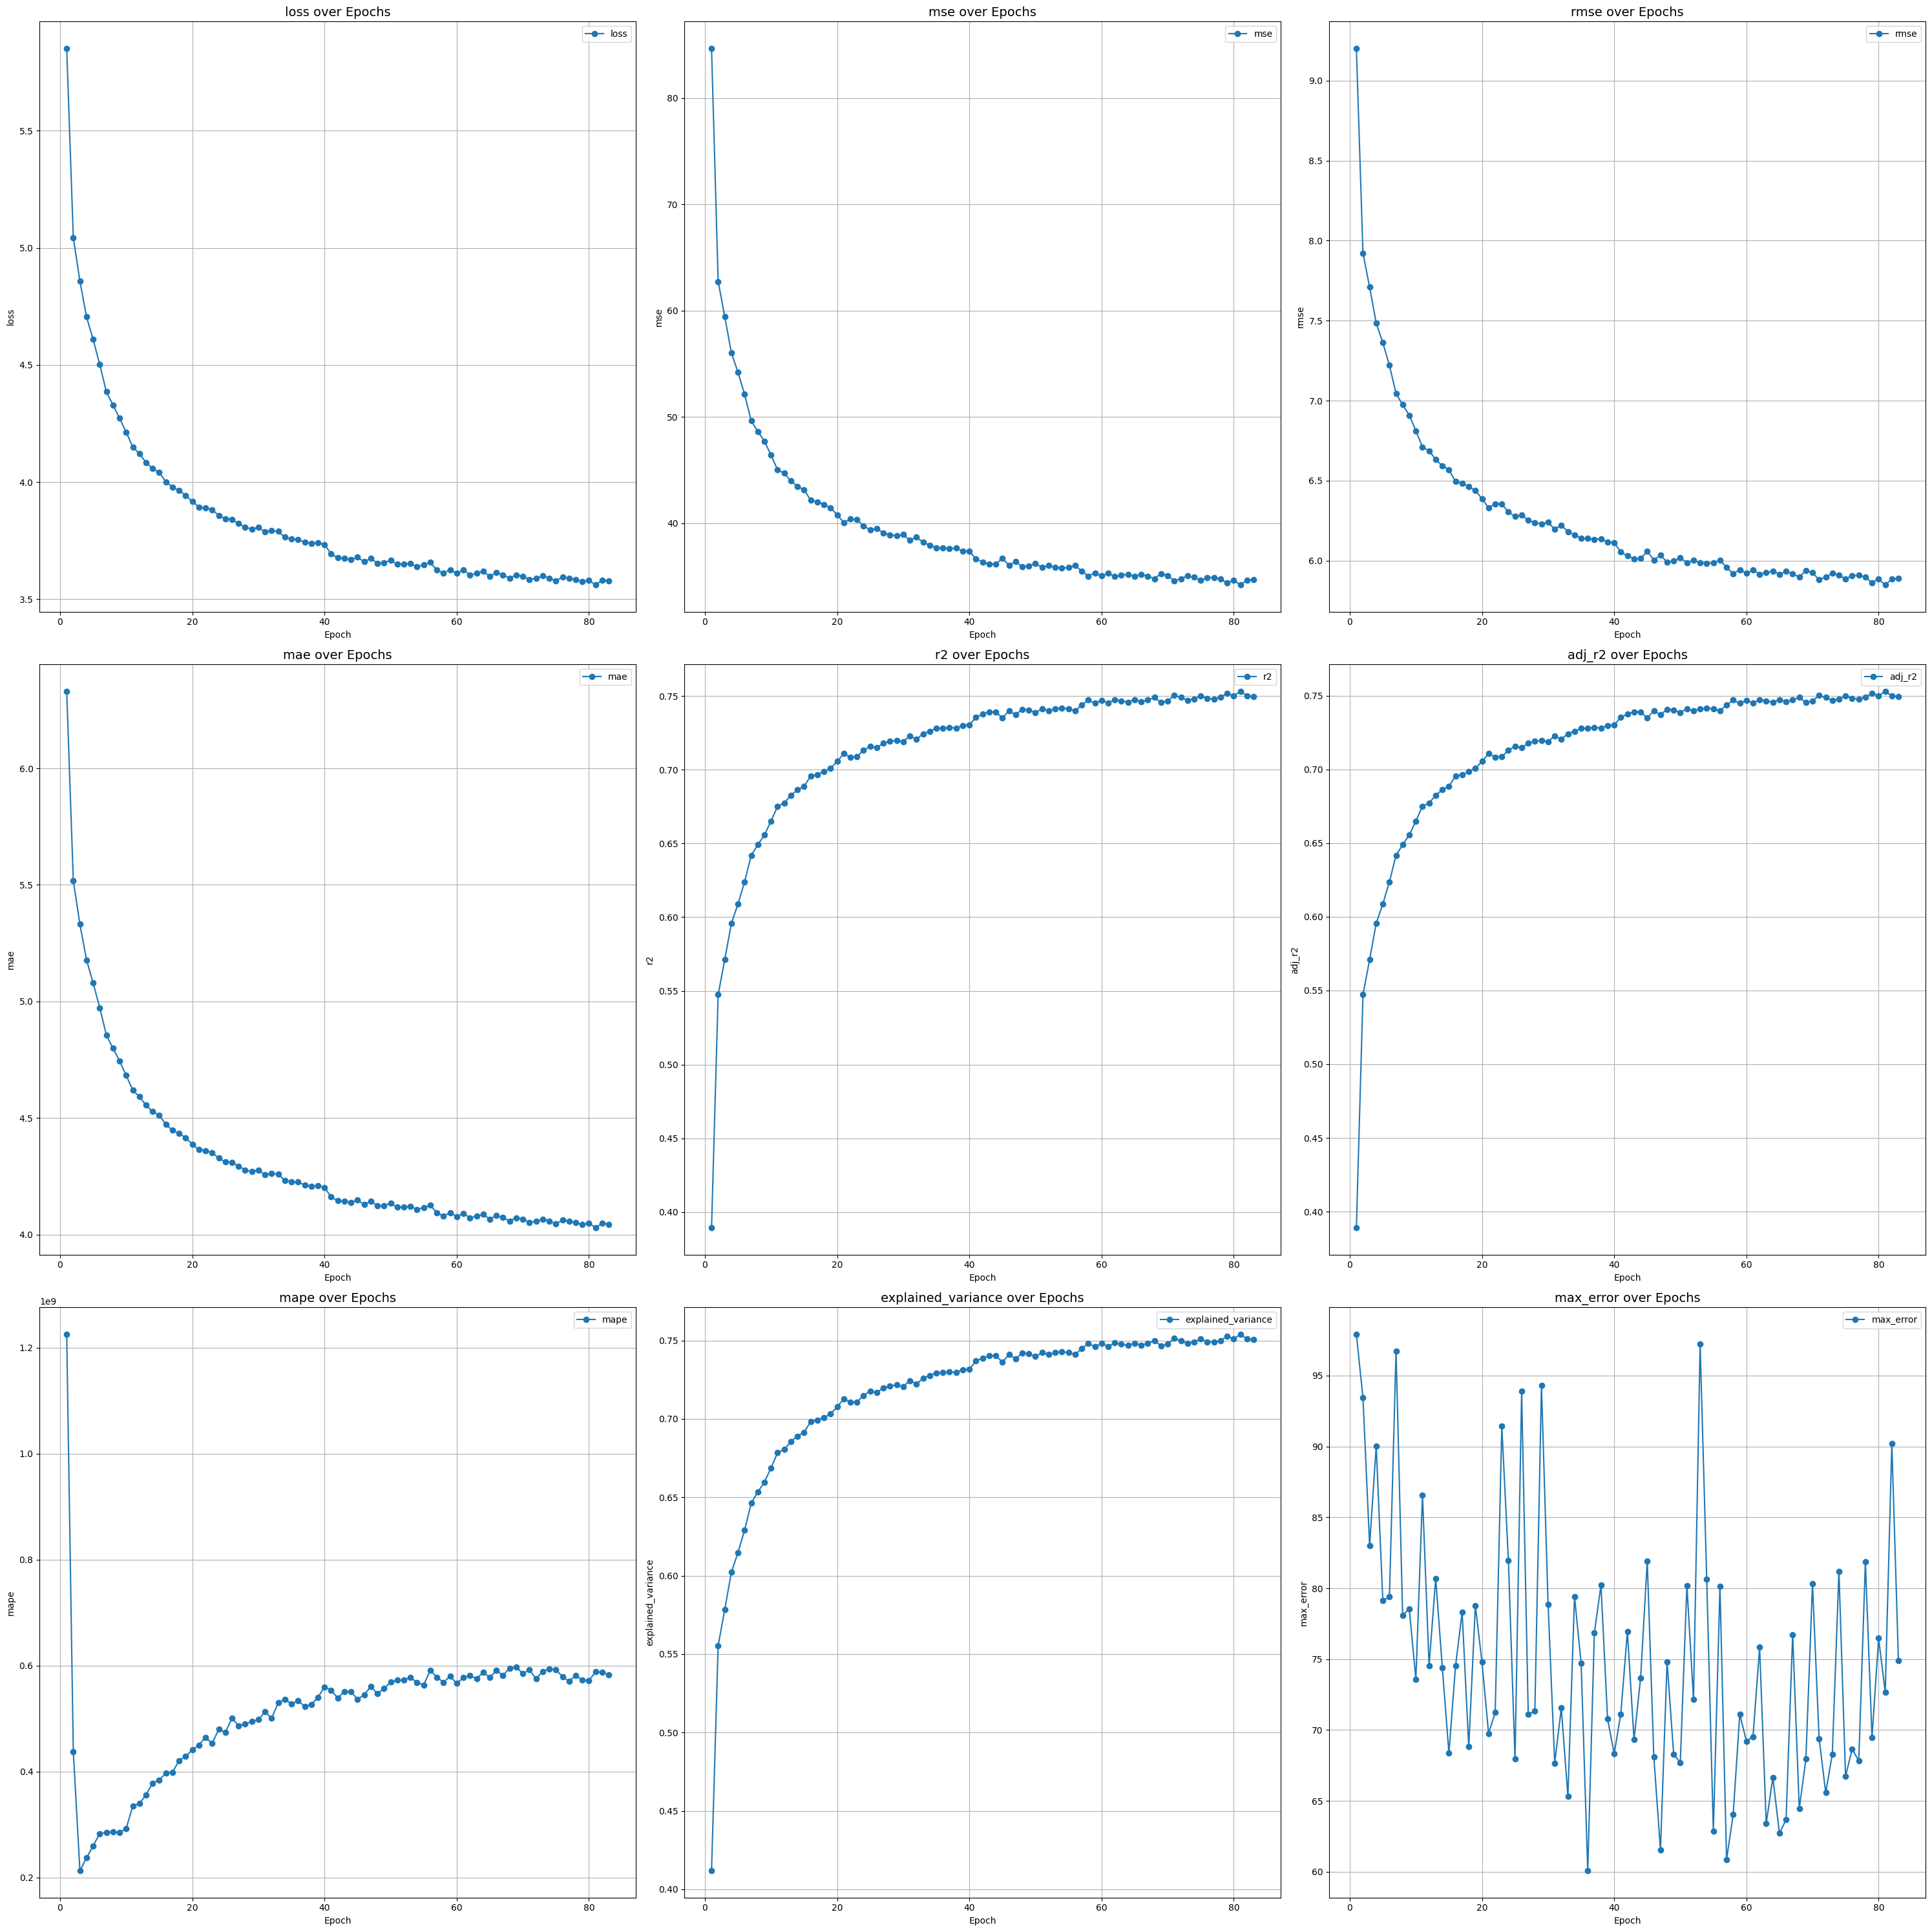

In [50]:
epochs = len(train_metrics_history)
metric_names = train_metrics_history[0].keys()
num_metrics = len(metric_names)
plt.figure(figsize=(30,30))

# Convert to dict of lists
metrics_by_name = {metric: [] for metric in metric_names}
for epoch_data in train_metrics_history:
    for metric in metric_names:
        metrics_by_name[metric].append(epoch_data[metric])

# Plot each metric over epochs
for idx, (metric_name, values) in enumerate(metrics_by_name.items()):
    plt.subplot((num_metrics + 2) // 3, 3, idx + 1)  # 3 columns layout
    plt.plot(range(1, epochs + 1), values, marker='o', label=metric_name)
    plt.title(f"{metric_name} over Epochs", fontsize=14)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

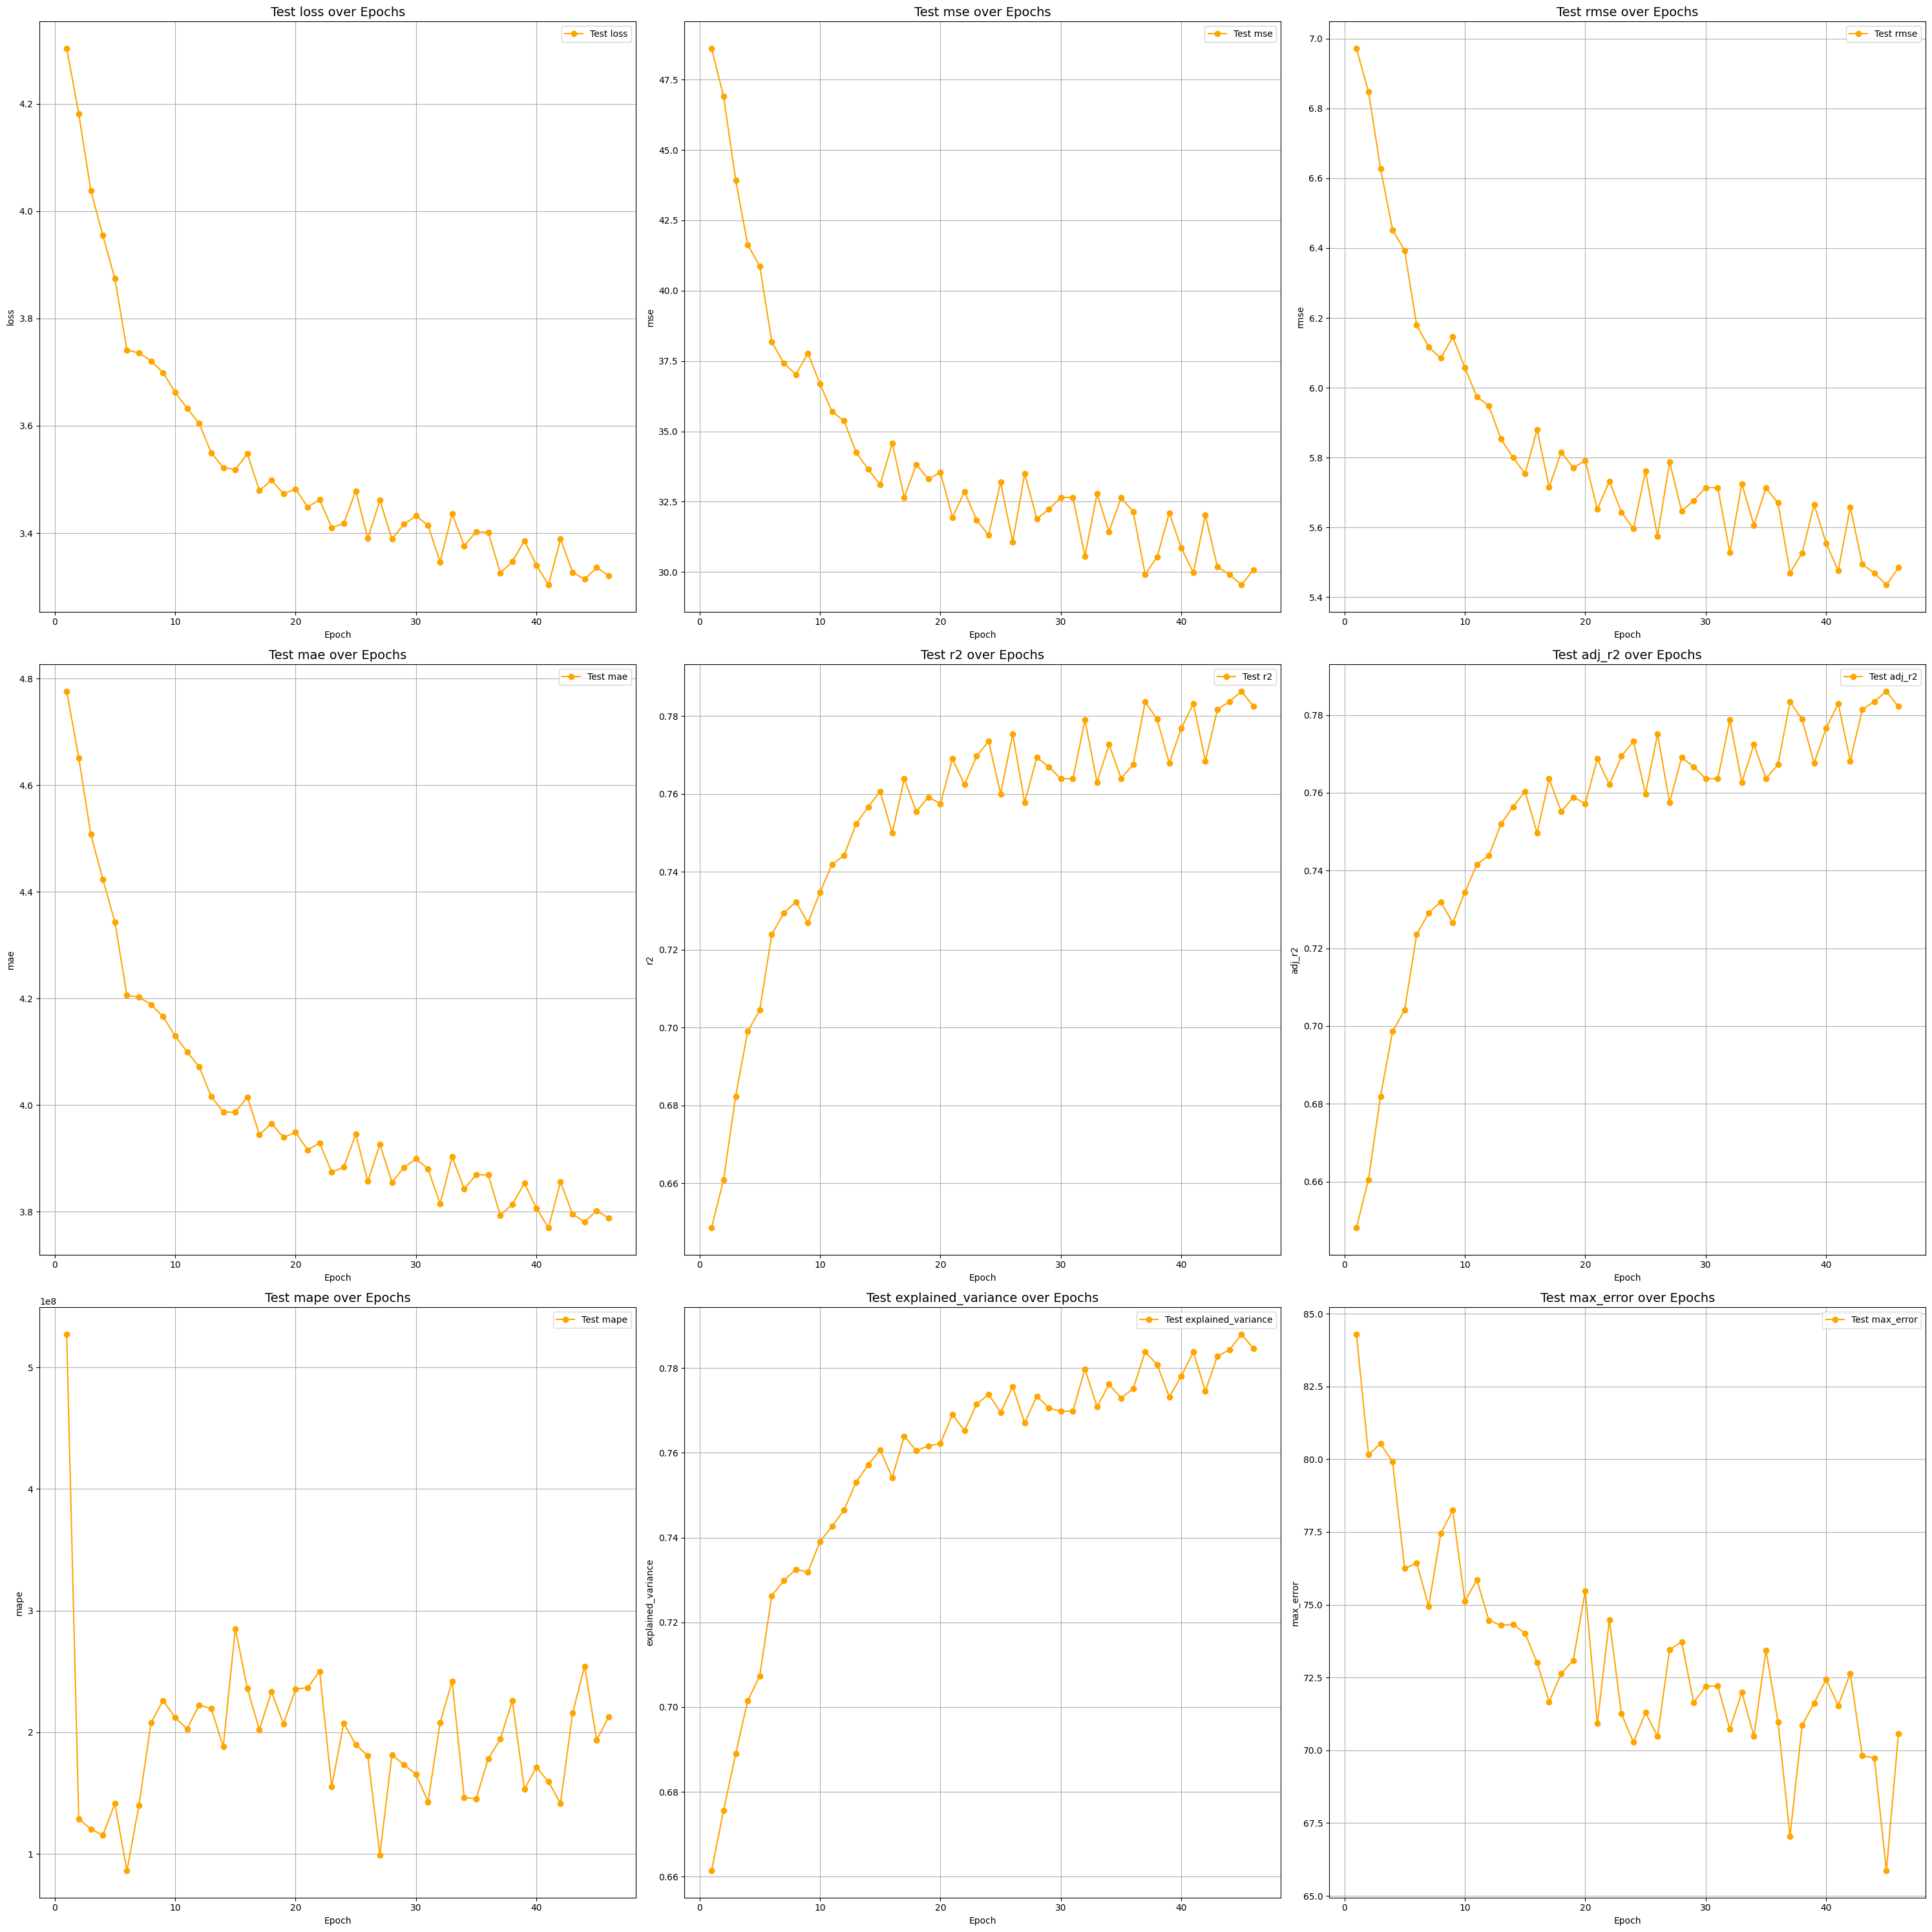

In [42]:
epochs = len(test_metrics_history)
metric_names = test_metrics_history[0].keys()
num_metrics = len(metric_names)

plt.figure(figsize=(30,30))

# Convert to dict of lists for plotting
metrics_by_name = {metric: [] for metric in metric_names}
for epoch_data in test_metrics_history:
    for metric in metric_names:
        metrics_by_name[metric].append(epoch_data[metric])

# Plot each metric over epochs
for idx, (metric_name, values) in enumerate(metrics_by_name.items()):
    plt.subplot((num_metrics + 2) // 3, 3, idx + 1)  # 3 columns layout
    plt.plot(range(1, epochs + 1), values, marker='o', color='orange', label=f"Test {metric_name}")
    plt.title(f"Test {metric_name} over Epochs", fontsize=14)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


In [51]:
test_metrics_history

[{'loss': np.float64(4.270578599934067),
  'mse': 47.7679068145802,
  'rmse': np.float64(6.91143305071967),
  'mae': 4.74417962109096,
  'r2': 0.6546224969282697,
  'adj_r2': 0.654175312437039,
  'mape': np.float32(640306800.0),
  'explained_variance': 0.6668966712788457,
  'max_error': 83.46206665039062},
 {'loss': np.float64(4.170472344117505),
  'mse': 45.60756286314348,
  'rmse': np.float64(6.753337164923981),
  'mae': 4.639984986979361,
  'r2': 0.670242486362171,
  'adj_r2': 0.6698155261674446,
  'mape': np.float32(114992216.0),
  'explained_variance': 0.6732779559458688,
  'max_error': 81.61947631835938},
 {'loss': np.float64(3.963115077997957),
  'mse': 41.3741518642565,
  'rmse': np.float64(6.432274237332897),
  'mae': 4.433009038004325,
  'r2': 0.7008514248268077,
  'adj_r2': 0.7004640961727946,
  'mape': np.float32(98374630.0),
  'explained_variance': 0.7008543017631362,
  'max_error': 80.08912658691406},
 {'loss': np.float64(3.8634317378912653),
  'mse': 41.422533410998774,


# Y vs Y_pred

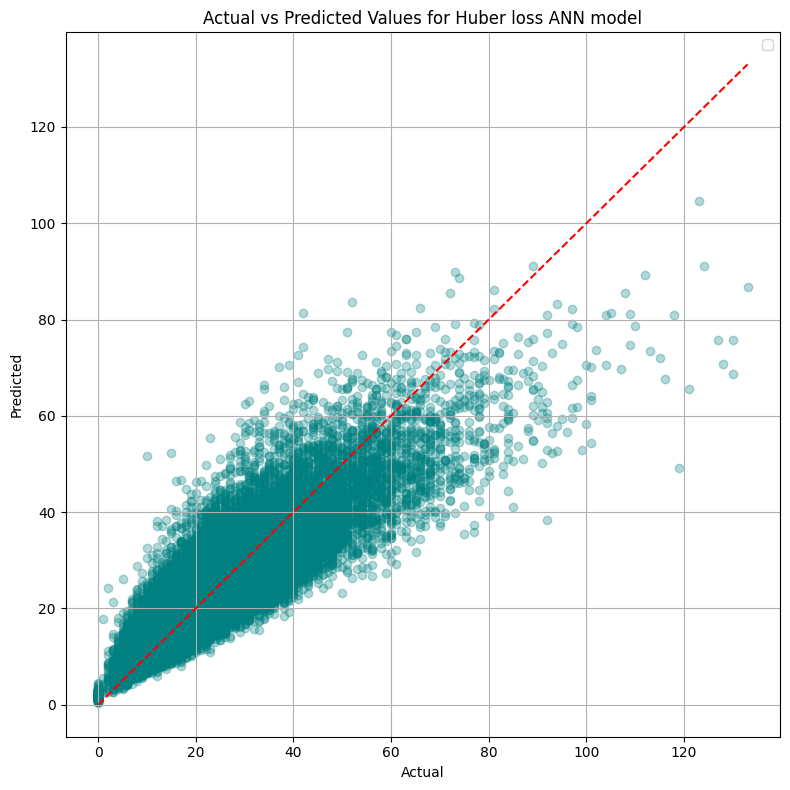

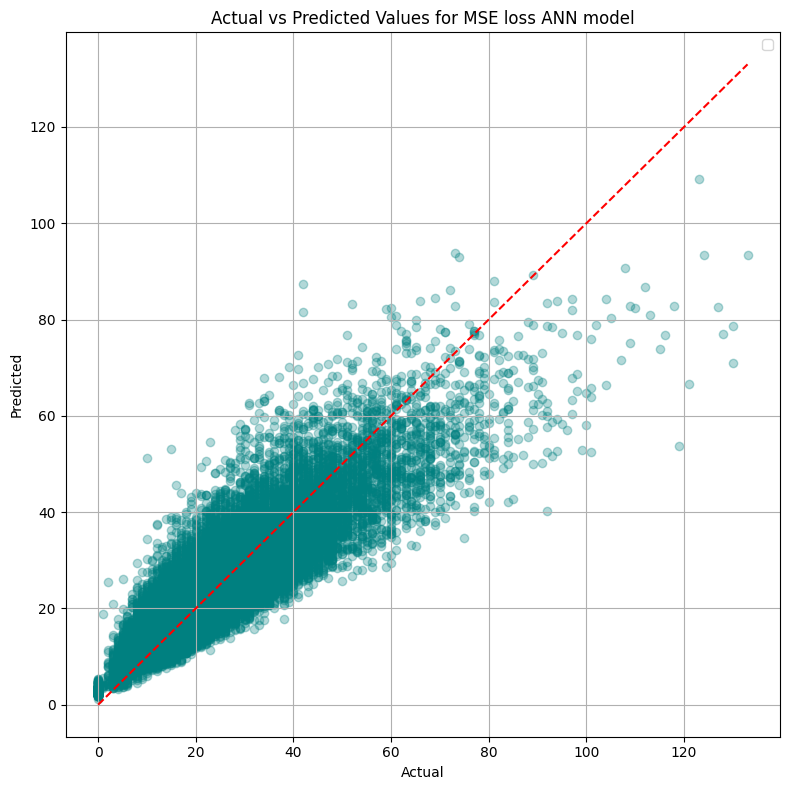

In [52]:
# y vs Y_pred
# we can't do this for all epochs and also it's just ingtermediate states, which is not helpful visually!
#what we do is, load the best model and predict results from y_pred  = model(x)

# Load best model from saved model.pth
model_huber.load_state_dict(torch.load("regression_model_huber.pth"))
model_huber.eval()
model_mse.load_state_dict(torch.load("regression_model_mse.pth"))
model_mse.eval()


y_test_true = []
y_test_pred_huber = []
y_test_pred_mse = []

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        output_huber = model_huber(x)
        output_mse = model_mse(x)
        
        y_test_true.extend(y.cpu().numpy())
        y_test_pred_huber.extend(output_huber.cpu().numpy())
        y_test_pred_mse.extend(output_mse.cpu().numpy())


#cod efor plots y vs y_pred_mse vs y_pred_huber


# y vs y_pred_huber
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test_true, y_test_pred_huber, alpha=0.3, color='teal')
plt.plot([min(y_test_true), max(y_test_true)], [min(y_test_true), max(y_test_true)], 'r--')  #r-- means red dotted line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values for Huber loss ANN model")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# y vs y_pred_huber
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test_true, y_test_pred_mse, alpha=0.3, color='teal')
plt.plot([min(y_test_true), max(y_test_true)], [min(y_test_true), max(y_test_true)], 'r--')  #r-- means red dotted line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values for MSE loss ANN model")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

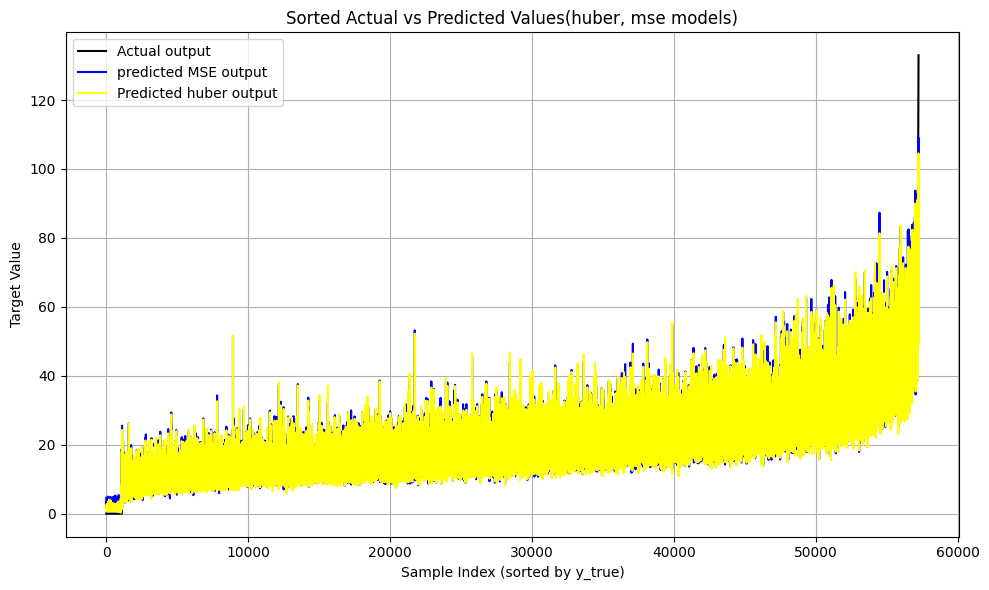

In [53]:
import numpy as np

sorted_idx = np.argsort(y_test_true)
y_test_true_sorted = np.array(y_test_true)[sorted_idx]
y_test_pred_sorted_huber = np.array(y_test_pred_huber)[sorted_idx]
y_test_pred_sorted_mse = np.array(y_test_pred_mse)[sorted_idx]

plt.figure(figsize=(10, 6))
plt.plot(y_test_true_sorted, label='Actual output', color='black')
plt.plot(y_test_pred_sorted_mse,label = 'predicted MSE output', color = 'blue')
plt.plot(y_test_pred_sorted_huber, label='Predicted huber output', color='yellow')

plt.title("Sorted Actual vs Predicted Values(huber, mse models)")
plt.xlabel("Sample Index (sorted by y_true)")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Results Interpretation:

| Metric        | Huber Model | MSE Model | Better                                                   |
| ------------- | ----------- | --------- | -------------------------------------------------------- |
| **MSE**       | 28.92       | **27.95** | ✅ MSE (slightly better)                                  |
| **RMSE**      | 5.38        | **5.29**  | ✅ MSE                                                    |
| **MAE**       | 3.74        | **3.72**  | ✅ MSE (barely)                                           |
| **Max Error** | 67.45       | **66.66** | ✅ MSE                                                    |
| **MAPE**      | ⚠️ 438M%    | ⚠️ 620M%  | ⚠️ Huber (but both are invalid due to near-zero actuals) |

\n


| Metric         | Huber Model | MSE Model  | Better |
| -------------- | ----------- | ---------- | ------ |
| **R²**         | 0.7909      | **0.7979** | ✅ MSE  |
| **Adj. R²**    | 0.7906      | **0.7976** | ✅ MSE  |
| **Expl. Var.** | 0.7926      | **0.7980** | ✅ MSE  |

\n


| Aspect                   | Huber Model                    | MSE Model              |
| ------------------------ | ------------------------------ | ---------------------- |
| **Training Loss**        | 34.64                          | **32.71**              |
| **Test Loss**            | 28.92                          | **27.95**              |
| **Gap (Train-Test MSE)** | 5.72                           | **4.76**               |
| **Max Error (Test)**     | 67.45                          | **66.66**              |
| **Early Stopping**       | Triggered at epoch 83 (stable) | Full training (stable) |




Use Case Suggestions:
Choose MSE if:

Data is clean

Performance is critical

You're optimizing standard metrics (MSE, RMSE)

Choose Huber if:

You expect noisy data or outliers

Slight performance drop is acceptable in favor of robustness

In [46]:
### I have also made a stream lit file and deployed it in my git hub stream.io
# i'll leave a link and app.py file for you to test some inputs 
## This project helped me learn, shout out to Beata Faron! for the dataset.


### Storing scalar and ohe files for streamlit to process inputs 
### i'm using Joblib, pickle also works fine!

In [47]:
import joblib

# Save scaler
joblib.dump(scalar, "standard_scalar.joblib")

# Save the entire ohe_dict as one file
joblib.dump(ohe_dict, "ohe_dict.joblib")


['ohe_dict.joblib']